# Introduction

**Project Process** :

This project used CRISP-DM methodology for whole process, except for the last process of deployment. The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. 

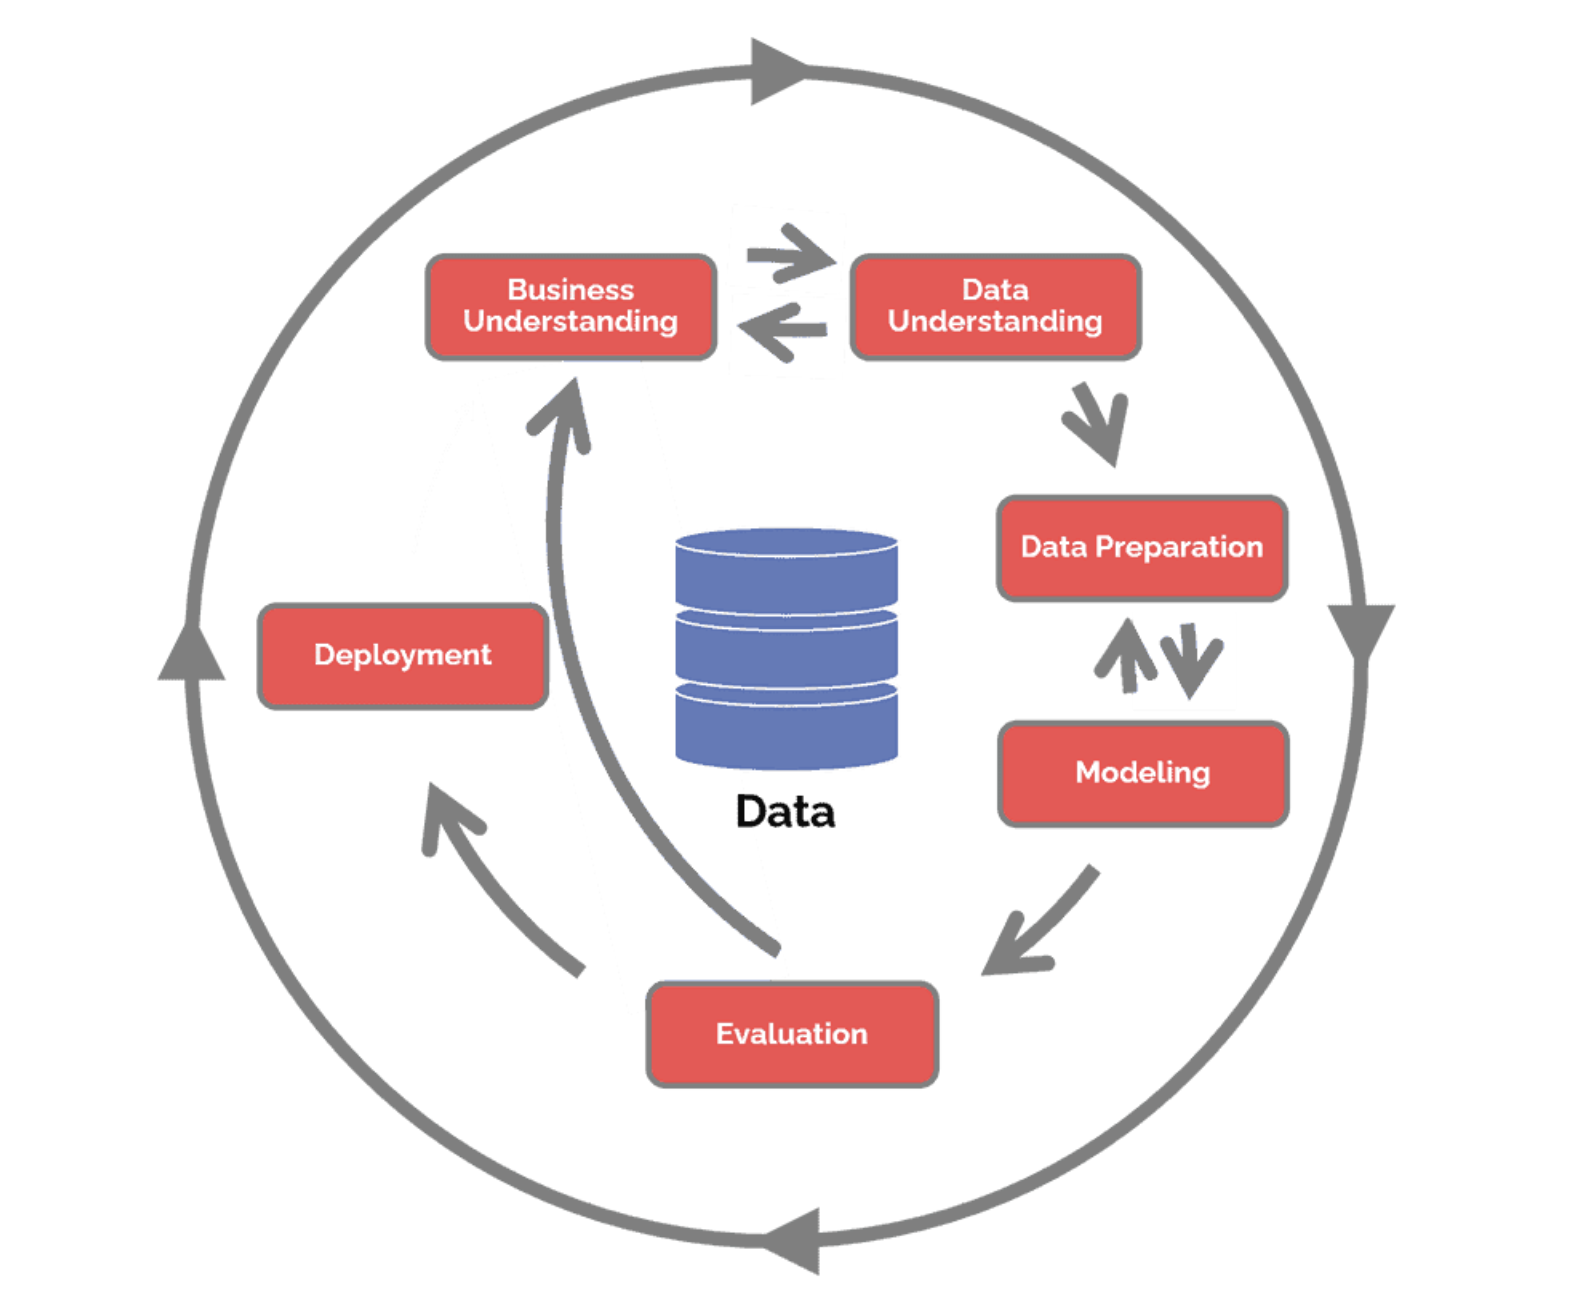

It has six sequential phases:

1. Business understanding – What does the business need?
2. Data understanding – What data do we have / need? Is it clean?
3. Data preparation – How do we organize the data for modeling?
4. Modeling – What modeling techniques should we apply?
5. Evaluation – Which model best meets the business objectives?
6. Deployment – How do stakeholders access the results?

Published in 1999 to standardize data mining processes across industries, it has since become the most common methodology for data mining, analytics, and data science projects.

___

**Dataset Context Assumptions** :

The dataset provided serves as a repository of past historical records, documenting the interactions and financial behaviors of loan applicants within the MoneyLion ecosystem. Here's a detailed elaboration on the assumptions surrounding the dataset's integrity and reliability:

1. **Historical Context** :
   - **Recorded Interactions:** The dataset captures a timeline of interactions, encompassing various stages of the loan application process. These stages typically include application submissions, approvals, fund disbursements, repayments, and other relevant transactions.
   - **Temporal Perspective:** Each record within the dataset represents a snapshot of a specific moment in the past, providing a historical context that aids in analyzing trends, patterns, and behavioral shifts over time.

2. **Assumption of Integrity** :
   - **Data Accuracy:** It is assumed that the dataset's entries are accurate representations of the actual events and transactions. The integrity of the data implies that it faithfully mirrors the real-world interactions between MoneyLion and the applicants.
   - **Consistency:** The consistency of data structures, formats, and variables is presumed, ensuring uniformity across the dataset. Consistent data enhances the dataset's reliability and usability for analytical purposes.

3. **Assumption of Reliability** :
   - **Source Credibility:** The dataset is believed to originate from credible and trustworthy sources within MoneyLion. Reliability is established through the credibility of the data sources, ensuring that the information is sourced from authoritative channels within the organization.
   - **Data Completeness:** It is assumed that the dataset is reasonably comprehensive, encompassing a significant portion of historical loan applications. While it might not cover every single application, it is expected to provide a representative sample of the applicant pool.

4. **Implications for Analysis** :
   - **Informed Decision-Making:** The integrity and reliability of the dataset instill confidence in the analytical outcomes. Decision-makers can rely on the historical patterns and insights derived from the data to make informed decisions regarding lending policies, risk assessment, and business strategies.
   - **Predictive Modeling:** Reliable historical data forms the foundation for predictive modeling. Machine learning algorithms and statistical analyses performed on such data yield reliable predictions and trends, enabling MoneyLion to anticipate applicant behaviors and loan outcomes accurately.

5. **Continuous Monitoring and Validation** :
   - **Ongoing Data Quality Assurance:** While assumptions of integrity and reliability are made, it is essential for MoneyLion to implement continuous monitoring and validation processes. Regular audits, data integrity checks, and validation against real-time records ensure that the dataset's integrity and reliability are maintained over time.

## Step 1: Business Understanding 

At MoneyLion, our ongoing commitment revolves around enhancing the accuracy of assessing applicant risk. The primary objective of our endeavor is to reliably predict the risk and repayment quality of loans for individual applicants.

**Purpose** :
This assessment central focus lies in predicting the risk associated with loan repayment for each applicant. By comprehensively evaluating the factors contributing to loan quality, it aims to make informed decisions regarding the applicants' eligibility for approval.

**Business Context Process Assumptions** :

1. **Client Loan Application Submission** :
   - **Description:** Applicants initiate the process by submitting their loan applications to MoneyLion.
   - **Significance:** This marks the beginning of the loan evaluation journey, where applicants express their financial needs.

2. **Application Details Sent to Default Approval Team** :
   - **Description:** MoneyLion forwards the application specifics to the dedicated Default Approval team.
   - **Significance:** The application details serve as the foundation for predictive analysis, guiding the team in assessing the risk associated with each applicant's repayment capabilities.

3. **Prediction Result from Default Approval Team** :
   - **Description:** The Default Approval team diligently analyzes the provided data and generates a prediction result.
   - **Significance:** Leveraging advanced algorithms and data-driven insights, the team predicts the likelihood of successful loan repayment. This prediction outcome forms a crucial basis for subsequent decisions.

4. **Loan Approval Decision by MoneyLion** :
   - **Description:** Based on the prediction result provided by the Default Approval team, related authorities evaluates the applicant's risk profile.
   - **Significance:** MoneyLion's approval decision is meticulously informed by the prediction outcome, ensuring that loans are granted to applicants with a higher probability of repayment success. This strategic approach enhances our ability to make prudent lending decisions, fostering financial stability for both MoneyLion and its clients.
___

My ideal scenario envisions the integration of the predictive model between steps 2 and 3 in the loan approval process. During this pivotal stage, the model meticulously evaluates the risk associated with each loan application, serving as the final checkpoint before granting approval. 

- **Significance of Model Placement** :
Positioning the predictive model between steps 2 and 3 holds strategic importance. In step 2, a significant portion of potentially fraudulent applications is efficiently filtered out, allowing us to concentrate our efforts on in-depth risk assessment. By integrating the model at this juncture, we enhance our ability to discern the nuances of genuine applications, identifying subtle patterns and indicators that impact repayment potential.

- **Focus on Risk Assessment** :
The primary focus of my model lies in assessing the risk associated with individual applications. By meticulously analyzing various factors, including `apr`, `payFrequency`, and other relevant variables, the model provides a nuanced understanding of each applicant's risk profile. This granular evaluation enables me to make highly informed decisions, aligning the loan approval process with MoneyLion's specific risk tolerance thresholds.

- **Enabling Informed Business Decisions** :
My strategic approach aims to empower MoneyLion with a streamlined method of evaluating application risk tailored to own risk tolerance criteria. By leveraging the insights generated by our predictive model, MoneyLion gains a comprehensive view of each applicant's creditworthiness and repayment potential. This newfound clarity opens avenues for well-informed, data-driven business decisions, fostering a lending environment characterized by prudence and financial acumen.

In essence, integrating the predictive model in this manner not only fortifies defense against fraudulent applications but also equips with the tools to make astute lending choices. By aligning the risk assessment with unique risk tolerance parameters, it pave the way for a secure and informed lending landscape at MoneyLion.

In [1]:
# Time measurement
import time
st = time.time()

In [2]:
## Library
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.offline as py

from scipy.stats import kurtosis, skew
import statistics as stat

from utils import *

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

import shap

/Users/kimhoonglim/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [3]:
# Ignore warnings 
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

## Step 2 : Data Understanding
There are 3 dataset given, namely *loan.csv, payment.csv, clarity_underwriting_variables.csv*

### A. Data Loading

In [5]:
# For simplicity, we use name (df1,df2,df3) to represent loan, payment 
# and clarity_underwriting_variables dataset respectively. 

df1 = pd.read_csv('loan.csv',parse_dates=['applicationDate', 'originatedDate'])
df2 = pd.read_csv('payment.csv')
df3 = pd.read_csv('clarity_underwriting_variables.csv',low_memory=False)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   loanId                            577426 non-null  object        
 1   anon_ssn                          577682 non-null  object        
 2   payFrequency                      576409 non-null  object        
 3   apr                               573760 non-null  float64       
 4   applicationDate                   577682 non-null  datetime64[ns]
 5   originated                        577682 non-null  bool          
 6   originatedDate                    46044 non-null   datetime64[ns]
 7   nPaidOff                          577658 non-null  float64       
 8   approved                          577682 non-null  bool          
 9   isFunded                          577682 non-null  int64         
 10  loanStatus                      

In [7]:
df1.head(15)

loanId                          anon_ssn payFrequency     apr  \
0   LL-I-07399092  beff4989be82aab4a5b47679216942fd            B  360.00   
1   LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.00   
2   LL-I-10707532  3c174ae9e2505a5f9ddbff9843281845            B  590.00   
3   LL-I-02272596  9be6f443bb97db7e95fa0c281d34da91            B  360.00   
4   LL-I-09542882  63b5494f60b5c19c827c7b068443752c            B  590.00   
5   LL-I-09734486  b5541f49472fa0fce8e473306768f7fb            M  650.00   
6   LL-I-15006968  1828c64bb2dffeae88b27174a9f79ecc            B  680.00   
7   LL-I-08327946  02596517e7633c7e87e6b333a0fb1bbe            M  449.99   
8   LL-I-10568307  523ed92e1145eb688bb631da24695197            S  251.00   
9   LL-I-05518977  47bf79119075e41ef65510f2900c8e4a            B  360.00   
10  LL-I-12004066  15340aa86b89972ac3c1572e2053e107            B  590.00   
11  LL-I-16484048  d7fa2d3cdff861249f57644e1050334a            B  645.00   
12  LL-I-06936557  2f90cd4d32d373e4c044a67fc4b9cb88            I  590.00   
13  LL-I-08740673  50e168ad9d93f7ee73e5f041822bd8dd            B  590.00   
14  LL-I-13956713  8f3bd2f82d48d6e3b221247be473d2e9            W  645.00   

           applicationDate  originated          originatedDate  nPaidOff  \
0  2016-02-23 17:29:01.940       False                     NaT       0.0   
1  2016-01-19 22:07:36.778        True 2016-01-20 15:49:18.846       0.0   
2  2016-08-01 13:51:14.709       False                     NaT       0.0   
3  2015-08-06 23:58:08.880       False                     NaT       0.0   
4  2016-06-05 22:31:34.304       False                     NaT       0.0   
5  2016-06-12 19:27:47.951       False                     NaT       0.0   
6  2017-01-12 18:04:37.921       False                     NaT       0.0   
7  2016-04-01 22:13:02.131       False                     NaT       0.0   
8  2016-07-27 00:19:52.808       False                     NaT       0.0   
9  2015-12-09 18:17:33.622       False                     NaT       0.0   
10 2016-09-14 17:49:10.712       False                     NaT       0.0   
11 2017-01-30 22:40:47.965       False                     NaT       0.0   
12 2016-02-01 01:56:09.600       False                     NaT       0.0   
13 2016-04-15 16:35:01.146       False                     NaT       0.0   
14 2016-12-27 12:09:22.807       False                     NaT       0.0   

    approved  isFunded             loanStatus  loanAmount  \
0      False         0  Withdrawn Application       500.0   
1       True         1          Paid Off Loan      3000.0   
2      False         0  Withdrawn Application       400.0   
3      False         0  Withdrawn Application       500.0   
4      False         0               Rejected       350.0   
5      False         0  Withdrawn Application       300.0   
6      False         0  Withdrawn Application       400.0   
7      False         0  Withdrawn Application       350.0   
8      False         0  Withdrawn Application      2600.0   
9      False         0  Withdrawn Application       500.0   
10     False         0  Withdrawn Application       500.0   
11     False         0  Withdrawn Application       700.0   
12     False         0               Rejected       300.0   
13     False         0  Withdrawn Application       800.0   
14     False         0               Rejected       600.0   

    originallyScheduledPaymentAmount state     leadType  leadCost fpStatus  \
0                             978.27    IL  bvMandatory         6      NaN   
1                            6395.19    CA    prescreen         0  Checked   
2                            1199.45    MO  bvMandatory         3      NaN   
3                            1074.05    IL  bvMandatory         3      NaN   
4                             814.37    NV  bvMandatory         3      NaN   
5                             738.18    IN      organic         0      NaN   
6                            1362.92    TX         lea

In [8]:
df1.describe()

apr       nPaidOff       isFunded     loanAmount  \
count  573760.000000  577658.000000  577682.000000  575432.000000   
mean      553.080972       0.037887       0.067480     514.245084   
std       110.046159       0.333366       0.250852     320.939929   
min         0.000000       0.000000       0.000000       0.000000   
25%       490.000000       0.000000       0.000000     350.000000   
50%       590.000000       0.000000       0.000000     500.000000   
75%       601.000000       0.000000       0.000000     500.000000   
max       705.590000      21.000000       1.000000    5000.000000   

       originallyScheduledPaymentAmount       leadCost          hasCF  
count                     577682.000000  577682.000000  577682.000000  
mean                        1428.897209       7.854389       0.619187  
std                          925.009141      12.853451       0.485587  
min                         -816.710000       0.000000       0.000000  
25%                         1023.640000       3.000000       0.000000  
50%                         1245.250000       3.000000       1.000000  
75%                         1615.660000       6.000000       1.000000  
max                        19963.630000     200.000000       1.000000

### Attribute Information
In this file there are 18 columns: 
1. **loanId**:
a. This is a unique loan identifier. Use this for joins with the payment.csv file 
2. **anon_ssn**:
a. This is a hash based on a client’s ssn. We can use this as if it is an ssn to compare if a loan belongs to a previous customer.
3. **payFrequency**:
a. This column represents repayment frequency of the loan:
i. B is biweekly payments ii. I is irregular
iii. M is monthly
iv. S is semi monthly
v. W is weekly
4. **apr**:
a. This is the loan apr %
5. **applicationDate**:
a. Date of application (start date)
6. **originated**:
a. Whether or not a loan has been originated (first step of underwriting before loan is
funded) 
7. **originatedDate**:
a. Date of origination- day the loan was originated 
8. **nPaidOff**:
a. How many MoneyLion loans this client has paid off in the past 
9. **approved**:
a. Whether or not a loan has been approved (final step of underwriting before a loan deposit is attempted)
10. **isFunded**:
a. Whether or not a loan is ultimately funded. –a loan can be voided by a customer
shortly after it is approved, so not all approved loans are ultimately funded. 
11. **loanStatus**:
a. Current loan status. Most are self explanatory. Below are the statuses which need clarification:
i. Returned Item: missed 1 payment (but not more), due to insufficient funds
ii. Rejected: Rejected by automated underwriting rules – not by human
underwriters
iii. Withdrawn Application – application abandoned for more than 2 weeks, or is
withdrawn by a human underwriter or customer
iv. Statuses with the word “void” in them mean a loan that is approved but cancelled. (One reason is the loan failed to be debited into the customer’s account).
12. **loanAmount**:
a. Principal of loan – for non-funded loans this will be the principal in the loan
application
13. **originallyScheduledPaymentAmount**:
a. This is the originally scheduled repayment amount (if a customer pays off all his scheduled payments, this is the amount we should receive)
14. **state**
a. Client’s state
15. **Lead type**
a. The lead type determines the underwriting rules for a lead.
i. bvMandatory: leads that are bought from the ping tree – required to perform bank verification before loan approval
ii. lead: very similar to bvMandatory, except bank verification is optional for loan approval
iii. california: similar to (ii), but optimized for California lending rules
iv. organic: customers that came through the MoneyLion website
v. rc_returning: customers who have at least 1 paid off loan in another loan portfolio. (The first paid off loan is not in this data set).
vi. prescreen: preselected customers who have been offered a loan through direct mail campaigns
vii. express: promotional “express” loans
viii. repeat: promotional loans offered through sms
ix. instant-offer: promotional “instant-offer” loans
16. **Lead cost**
a. Cost of the lead
17. **fpStatus**
a. Result
ii. Rejected – payment is unsuccessful
iii. Cancelled – payment is cancelled
iv. No Payments/No Schedule – loan is not funded
v. Pending – ACH attempt has been submitted to clearing house but no response yet
vi. Skipped – payment has been skipped
vii. None – No ACH attempt has been made yet – usually because the payment is
scheduled for the future
18. **clarityFraudId**:
a. unique underwriting id. Can be used to join with columns in the
clarity_underwriting_variables.csv file

Every row represents an accepted loan application/ successfully funded loan.
Missing values can exist. Some fields are only implemented after the loan application was made.

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loanId             689364 non-null  object 
 1   installmentIndex   689364 non-null  int64  
 2   isCollection       689364 non-null  bool   
 3   paymentDate        689364 non-null  object 
 4   principal          689364 non-null  float64
 5   fees               689364 non-null  float64
 6   paymentAmount      689364 non-null  float64
 7   paymentStatus      689364 non-null  object 
 8   paymentReturnCode  31533 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 42.7+ MB


In [10]:
df2.head(15)

loanId  installmentIndex  isCollection                 paymentDate  \
0   LL-I-00000021                 1         False         2014-12-19T05:00:00   
1   LL-I-00000021                 2         False         2015-01-02T05:00:00   
2   LL-I-00000021                 3         False         2015-01-16T05:00:00   
3   LL-I-00000021                 4         False         2015-01-30T05:00:00   
4   LL-I-00000021                 5         False         2015-02-13T05:00:00   
5   LL-I-00000021                 6         False         2015-02-27T05:00:00   
6   LL-I-00000021                 7         False         2015-03-13T04:00:00   
7   LL-I-00000021                 8         False         2015-03-27T04:00:00   
8   LL-I-00000021                 9         False         2015-04-10T04:00:00   
9   LL-I-00000021                10         False         2015-04-24T04:00:00   
10  LL-I-00000021                11         False         2015-05-08T04:00:00   
11  LL-I-00000021                12         False         2015-05-22T04:00:00   
12  LL-I-00000021                 1          True  2016-04-28T22:44:43.736000   
13  LL-I-00000231                 1         False         2014-12-11T05:00:00   
14  LL-I-00000231                 2         False         2014-12-26T05:00:00   

    principal    fees  paymentAmount paymentStatus paymentReturnCode  
0       22.33  147.28         169.61       Checked               NaN  
1       26.44  143.17         169.61       Checked               NaN  
2       31.30  138.31         169.61       Checked               NaN  
3       37.07  132.54         169.61       Checked               NaN  
4       43.89  125.72         169.61       Checked               NaN  
5       51.97  117.64         169.61       Checked               NaN  
6       61.54  108.07         169.61       Checked               NaN  
7       72.87   96.74         169.61       Checked               NaN  
8       86.29   83.32         169.61       Checked               NaN  
9      102.17   67.44         169.61      Rejected               R01  
10     120.98   48.63         169.61       Checked               NaN  
11     143.15   26.35         169.50       Checked               NaN  
12       0.01    0.00           0.01       Checked               NaN  
13       0.00   84.16          84.16       Checked               NaN  
14      27.20  147.28         174.48       Checked               NaN

In [11]:
df2.describe()

installmentIndex      principal           fees  paymentAmount
count     689364.000000  689364.000000  689364.000000  689364.000000
mean          10.553222      45.557543      67.003994     112.680232
std            8.049530      81.724683      59.789510     105.783710
min            1.000000    -303.370000     -42.560000    -337.700000
25%            5.000000      13.180000      28.820000      56.810000
50%            9.000000      27.610000      51.300000      86.340000
75%           14.000000      53.380000      86.440000     135.090000
max          105.000000    4000.000000    1257.710000    4063.600000

### Attribute Information
9 columns in this file:
1. **loanId**:
a. This is a unique loan identifier. Use this for joins with the loan.csv file
2. **isCollection**
a. A loan can have a custom made collection plan if the customer has trouble making
repayments as per the original schedule. TRUE means the payment is from a custom
made collection plan.
3. **installmentIndex**
a. This counts the nth payment for the loan. First payment is 1, 2nd payment is 2 and so on.
b. This index resets for collection payment plans. So some loans can have 2 payments with the same installmentIndex. One from the regular plan and one from the collection plan.
4. **paymentdate**
a. Effective of payment
5. **prinicpal**
a. principal component of the payment
6. **fees**
a. Fee/ interest amount of the payment
7. **paymentAmount**
a. Total amount of the payment
b. Usually equals to fees + principal
8. **paymentStatus**
a. Checked – payment is successful
b. Rejected – payment is unsuccessful
c. Cancelled – payment is cancelled
d. Pending – ACH attempt has been submitted to clearing house but no response yet
e. Skipped – payment has been skipped
f. None – No ACH attempt has been made yet – usually because the payment is
scheduled for the future
g. Rejected awaiting retry – retrying a failed ACH attempt.
9. **paymentReturnCode**: these are ACH error codes to explain why the payment failed. You can find more information about this at the end of this document, or visit the following link:
a. https://www.vericheck.com/ach-return-codes/

Each row in this file represents an ACH attempt (either scheduled for the future or has elapsed in the past) associated to the loan.

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 54 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                  49750 non-null  float64
 1   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                             49750 non-null  float64
 2   .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                   49750 non-null  float64
 3   .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                     49750 non-null  float64
 4   .underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                  49750

## Step 3 : Data Preparation

### A. Data Merging & Data Transformation

**A1. Payment Dataset Decision**

Recognize that the payment dataset lacks relevance for our prediction because payments are made only after the loan approval. Since the loan approval is pending, the payment data is not utilized in our modeling stage. Hence, we opt not to include it in our analysis.

**A2. Selecting only the `ClearFraudScore` Column**

In the process of analyzing the *clarity_underwriting_variables* dataset, a strategic decision has been made to focus specifically on the `ClearFraudScore` column as we could assume all of the important points and variables are included and mentioned in this variable.

**A3. Filtering by `isFunded` Column**

In the process of data transformation, one of the crucial steps involves filtering the dataset based on the `isFunded` column, focusing specifically on the instances where the value is '1'. Here’s a detailed explanation of why this filtering is essential and how it impacts the dataset:

1. **Purpose of Filtering:** 
   - **Focus on Funded Loans:** By filtering the dataset where 'isFunded' is 'Yes', the analysis narrows down the scope to loans that have successfully secured funding. These funded loans are the ones that have passed the initial approval stages and have financial backing for disbursement.

2. **Importance of Focusing on Funded Loans:**
   - **Relevance to Risk Assessment:** Funded loans represent commitments made by the MoneyLion, indicating a certain level of trust in the applicant’s ability to repay for the past history. Analyzing funded loans specifically allows for a more targeted assessment of risk, as these are the applications that have progressed beyond the initial approval phase.
   - **Quality of Data:** Focusing on funded loans ensures that the analysis is based on real-world scenarios, where actual financial transactions are involved. This approach enhances the quality and practical relevance of the insights derived from the dataset.

3. **Refined Risk Evaluation:**
   - **In-Depth Risk Analysis:** By concentrating on funded loans, the risk evaluation can delve deeper into the repayment behavior, creditworthiness, and other relevant factors specific to applicants who have secured funding. This focused analysis enables a more nuanced understanding of the risk landscape within the context of approved and funded applications.

4. **Strategic Decision-Making:**
   - **Informed Decision Criteria:** Analyzing funded loans allows MoneyLion to establish specific criteria and benchmarks based on successful loan disbursements. This information becomes invaluable for setting informed lending policies, tailoring loan products, and optimizing decision-making processes.
   - **Risk Mitigation:** By focusing on funded loans, MoneyLion can identify patterns, trends, or risk factors associated with successful repayment. This insight aids in developing strategies to mitigate risks, improve credit scoring models, and enhance overall risk management practices.

**A4. Dropping the 'clarityFraudId' and 'underwritingid' Column**
   - After combining the dataset of `loan.csv` and `clarity_underwriting_variables.csv`, we only required to maintain a primary key (which is `loanId` variable) for the merged dataset.

In [13]:
# Only maintain 'underwritingid' and 'clearfraudscore' from df3
df3 = df3[['underwritingid', 'clearfraudscore']]

# Merged merged_df and df3 as merged_df1
merged_df1 = pd.merge(df1, df3, left_on = 'clarityFraudId', right_on = 'underwritingid')

In [14]:
temp = merged_df1[(merged_df1['isFunded'] == True)]

In [15]:
filter_data1 = temp.drop(['clarityFraudId','underwritingid'],axis = 1)

In [16]:
filter_data1.head()

loanId                          anon_ssn payFrequency    apr  \
0  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
1  LL-I-17826953  7529d29c9d943cc55bc71a85d9c6b7a3            W  645.0   
2  LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c            S  490.0   
3  LL-I-17491287  bc9fa73468acf18cb968a3a6a3c4697c            S  490.0   
4  LL-I-15679301  bc9fa73468acf18cb968a3a6a3c4697c            S  490.0   

          applicationDate  originated          originatedDate  nPaidOff  \
0 2016-01-19 22:07:36.778        True 2016-01-20 15:49:18.846       0.0   
1 2017-03-01 15:55:41.823        True 2017-03-01 16:15:13.016       0.0   
2 2017-01-31 17:48:17.381        True 2017-01-31 18:00:14.520       2.0   
3 2017-02-21 17:20:23.671        True 2017-02-21 17:45:11.088       3.0   
4 2017-01-18 01:16:24.941        True 2017-01-18 01:30:16.712       1.0   

   approved  isFunded     loanStatus  loanAmount  \
0      True         1  Paid Off Loan      3000.0   
1      True         1       New Loan       400.0   
2      True         1  Paid Off Loan      1250.0   
3      True         1  Paid Off Loan      1250.0   
4      True         1  Paid Off Loan       500.0   

   originallyScheduledPaymentAmount state   leadType  leadCost fpStatus  \
0                           6395.19    CA  prescreen         0  Checked   
1                           1364.87    NJ       lead        40  Checked   
2                           3313.78    MO    organic         0  Checked   
3                           3112.16    MO    organic         0  Checked   
4                           1292.09    MO    organic         0  Checked   

   hasCF  clearfraudscore  
0      1            879.0  
1      1            658.0  
2      1            835.0  
3      1            835.0  
4      1            835.0

In [17]:
filter_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32180 entries, 0 to 36333
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   loanId                            32180 non-null  object        
 1   anon_ssn                          32180 non-null  object        
 2   payFrequency                      32180 non-null  object        
 3   apr                               32180 non-null  float64       
 4   applicationDate                   32180 non-null  datetime64[ns]
 5   originated                        32180 non-null  bool          
 6   originatedDate                    32180 non-null  datetime64[ns]
 7   nPaidOff                          32178 non-null  float64       
 8   approved                          32180 non-null  bool          
 9   isFunded                          32180 non-null  int64         
 10  loanStatus                        32180 non-nu

The observations from the summary of the merged dataset indicate the presence of missing values in several key variables, notably in `fpStatus`, `paymentReturnCode`, `clearfraudscore`.

Addressing missing values systematically is crucial to maintain data quality, ensuring that subsequent analyses and interpretations are reliable and accurate. By understanding the implications of missing data and employing appropriate strategies, researchers can mitigate the impact of missing values on their analyses and conclusions.

In [18]:
print("Number of rows :",len(filter_data1))
print("Number of columns :",len(filter_data1.columns))

Number of rows : 32180
Number of columns : 19


### B. Data Visualization
When analyzing a dataset, each potential variable (excluding primary keys, as they are unique identifiers and not typically analyzed for insights) should be individually examined. This process involves creating visualizations such as bar charts and box plots to gain insights into the data. Let's break down the steps for this analysis:

1. **Variable Identification:**
   Start by identifying the variables in the merged dataset that we want to analyze. These can include numerical variables (representing quantitative data) and categorical variables (representing qualitative data).

2. **Understanding Categorical Variables:**
   For categorical variables (such as `originated`, or `approved`), using bar charts is a common practice. A bar chart displays the count or frequency of each category in the variable. By creating a bar chart, we can quickly identify which categories are more common or rare in the dataset. This can reveal patterns and imbalances within the data. For instance, if we're analyzing a dataset containing information about the loan approval status, a bar chart can show the distribution of different current of a loan application.

3. **Analyzing Numerical Variables:**
   For numerical variables (such as `apr`, or `loanAmount`), box plots are often used. A box plot provides a summary of the variable's distribution, showing the minimum, first quartile (Q1), median (second quartile or Q2), third quartile (Q3), and maximum values. Additionally, box plots help identify potential outliers in the data. Outliers are data points that significantly deviate from the rest of the data and can provide valuable insights into unusual or exceptional cases.

4. **Identifying Patterns and Outliers:**
   - **Bar Charts:** Analyzing bar charts can reveal trends, preferences, or imbalances within different categories. For example, in the dataset, Payment status variable can demonstrated the different status of the loan applicants. 
   - **Box Plots:** Box plots help identify the central tendency of the data (median), the spread of the data (interquartile range, IQR), and the presence of outliers. Outliers in box plots can represent data points that require further investigation. For instance, in the dataset of `paymentAmount` variable, a box plot can indicate if there are exceptionally high earners or unusually low-income individuals that capable of the repayment amount.

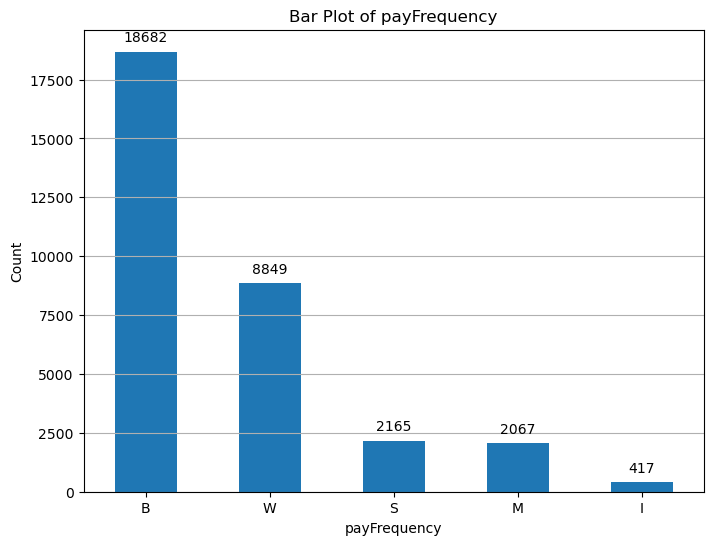

In [19]:
plot_discrete_variable(filter_data1, 'payFrequency',0)

**Observations** : The bar plot provides valuable insights into the preferred loan repayment frequencies among applicants. It is evident from the data that the majority of applicants favor repaying their loans on a biweekly and weekly basis.

**Analysis** : Understanding the repayment preferences of applicants is essential for MoneyLion when designing loan products and repayment plans. The popularity of biweekly and weekly repayment schedules suggests that these frequencies are widely accepted and convenient for most applicants. MoneyLion can capitalize on this information by offering loan products with repayment schedules aligned with these preferred frequencies. Doing so enhances customer satisfaction and ensures a more seamless loan repayment process.

Additionally, acknowledging these preferences allows MoneyLion to tailor their communication and outreach strategies. By highlighting the availability of biweekly and weekly repayment options, we can attract more applicants who find these schedules compatible with their financial planning. Furthermore, emphasizing these popular repayment frequencies can also be a key marketing point, attracting potential applicants who prioritize flexibility and convenience in loan repayment. Overall, aligning loan products with applicant preferences enhances customer engagement and fosters a positive relationship between applicants and MoneyLion.

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Mean    :  532.511965382225
Var     :  16543.310124476895
Skew    :  -1.01635240091674
Kurt    :  -0.006638147194099719
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


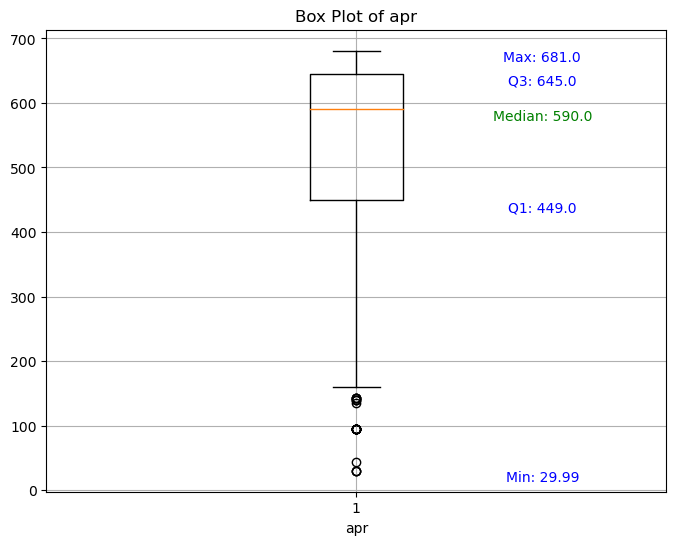

In [20]:
plot_box_plot(filter_data1, 'apr')

**Observations** : The box plot reveals valuable insights about the `Apr` variable in the dataset. One notable observation is the presence of a very low number of outliers, indicating that there are only a few applicants with exceptionally low `Apr` values. Additionally, the variable exhibits a high variance, indicating a significant range of `Apr` values in the dataset, emphasizing the diverse nature of the APR rates provided.

Furthermore, the negative skewness value of -1.02 suggests that the distribution of `Apr` values is skewed to the left. This implies that a majority of applicants have higher `Apr` rates, with a tail stretching towards the lower `Apr` values. The presence of negative skewness often signifies an asymmetrical distribution with an extended tail on the left side.

Additionally, the negative kurtosis value of -0.007 indicates that the distribution of `Apr` values has a heavier tail and a sharper peak compared to a normal distribution. While a kurtosis value close to 0 suggests a nearly normal distribution, a negative kurtosis, as observed here, signifies that the distribution has more extreme values, leading to a more peaked and heavy-tailed shape.

**Analysis** : Understanding the statistical properties of the `Apr` variable is crucial for financial analysis and decision-making. The presence of outliers suggests the need for further investigation into the applicants with exceptionally high or low APR rates, as these cases might require special attention or consideration in financial planning.

Moreover, the high variance, negative skewness, and positive kurtosis indicate the non-uniform distribution of APR rates among applicants. MoneyLion should be aware of this variability while setting APR rates for new applicants. Tailoring financial products and services to accommodate this diverse range of APR rates is essential to meet the needs of a wide array of customers effectively.

Additionally, this knowledge enables financial analysts to make informed predictions and assess the risk associated with different APR rates, ultimately guiding strategic decision-making processes within the company.

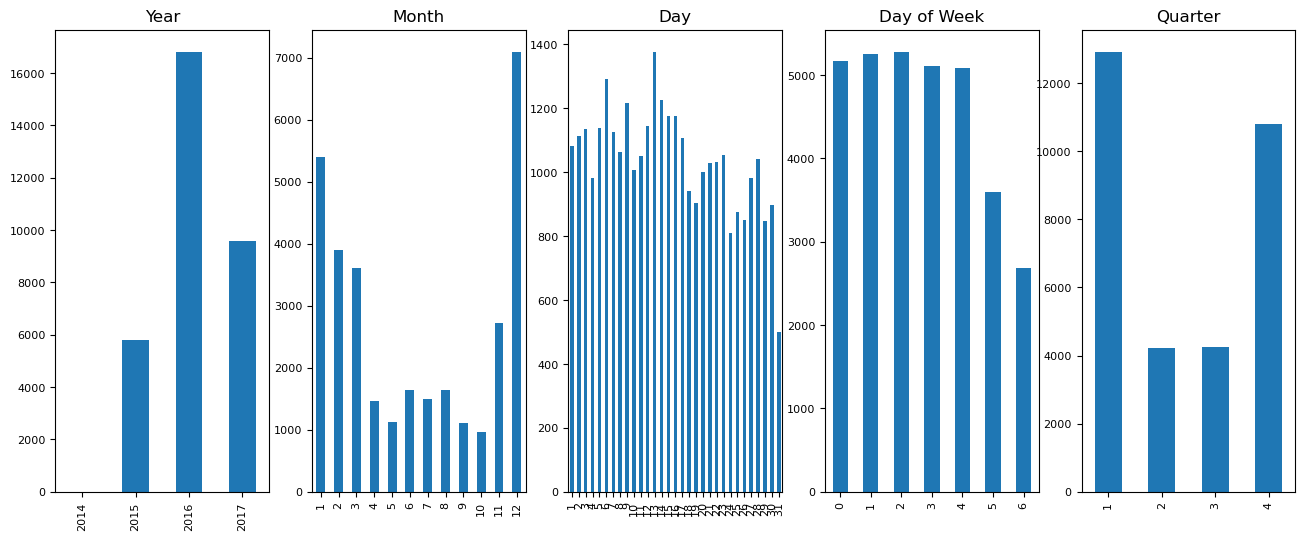

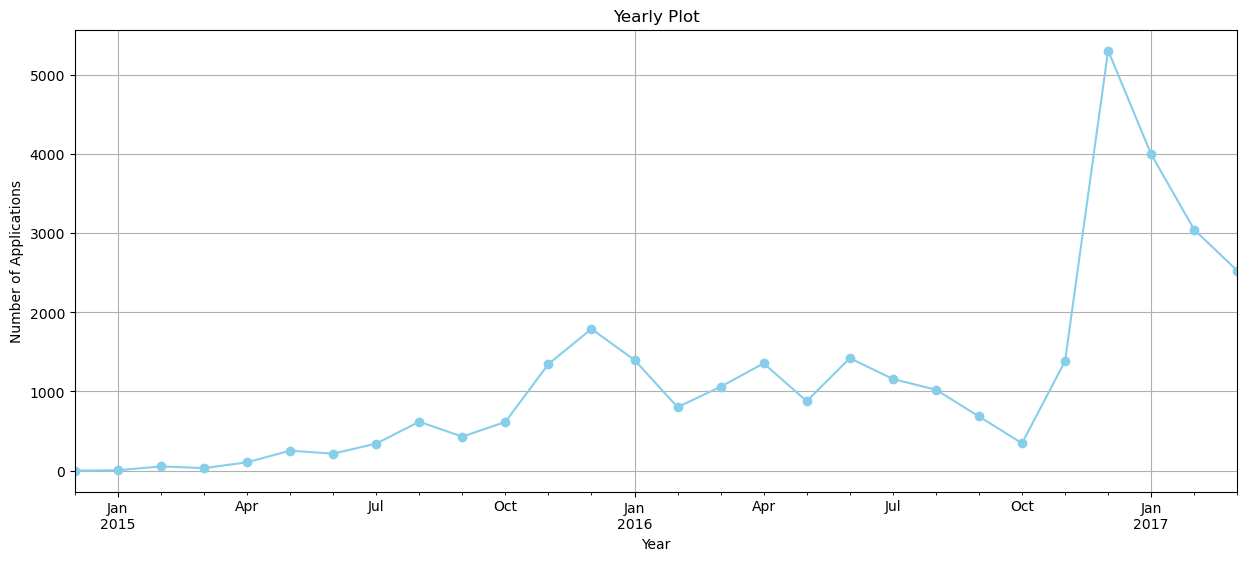

In [21]:
plot_time_frame(filter_data1, 'applicationDate')
plot_time_series(filter_data1,'applicationDate')

**Observations** : The detailed analysis of the `applicationDate` variable, considering various time-related components, provides significant insights into the loan application patterns. Here's a breakdown of the observations made from the variable plotting:

1. **Yearly Patterns** 
   - **Upwards Pattern** : An upward trend in the `applicationDate` suggests an increase in the number of applications over time. This pattern could be influenced by various factors, and understanding the trend is crucial for making informed decisions. It's essential to dive deeper into the data and possibly conduct further analysis to identify the root causes of the upward trend. 
   - **Peak in 2016** : A noticeable peak in loan applications is observed in the year 2016. This surge could be indicative of favorable economic conditions, increased marketing efforts, or changes in lending policies that attracted a higher number of applicants during that period. Detailed potential factors are required to be analysed thoroughly.
   - **Sparse Cases in 2014** : The scarcity of loan applications in 2014 suggests a limited presence of MoneyLion's lending services during that year. This might signify the initial stages of the company's operations or specific market strategies during that timeframe.

2. **Monthly Peaks** 
   - **January and December Surges** : Peaks in loan applications during January and December align with festival seasons. This observation implies that applicants might seek financial assistance to manage expenses related to holidays, gift-giving, travel, or other festive activities, making these months peak periods for loan requests.

3. **Daily Fluctuations** 
   - **Seesaw Pattern** : The daily plot exhibits a seesaw pattern, indicating fluctuating application volumes on different days. These variations might be influenced by factors such as paydays, bill due dates, or specific events, causing applicants to choose specific days for loan applications.

4. **Day of Week Preferences** 
   - **Weekday Dominance** : Most loan applications occur on weekdays, with a noticeable drop in applications during weekends (Saturday and Sunday). This trend suggests that applicants tend to initiate loan requests during their workweek, possibly when they are managing financial matters and planning for upcoming expenses.

5. **Quarterly Trends** 
   - **Sharp Rises in Q1 and Q4** : Loan applications experience significant spikes during the first (Q1) and fifth (Q4) quarters. Q1 corresponds with the beginning of the year, where individuals often plan for new investments or financial resolutions. Q4, being the year-end, might witness increased applications due to year-end financial planning, holiday expenses, or other financial obligations.

**Analysis** : Understanding these temporal patterns allows MoneyLion to optimize its marketing strategies, enhance customer engagement during peak periods, and tailor its lending services to meet the specific needs of applicants, especially during festival seasons and strategic quarters of the year. By aligning their services with these observed trends, MoneyLion can effectively cater to the fluctuating demands of applicants throughout the calendar year.

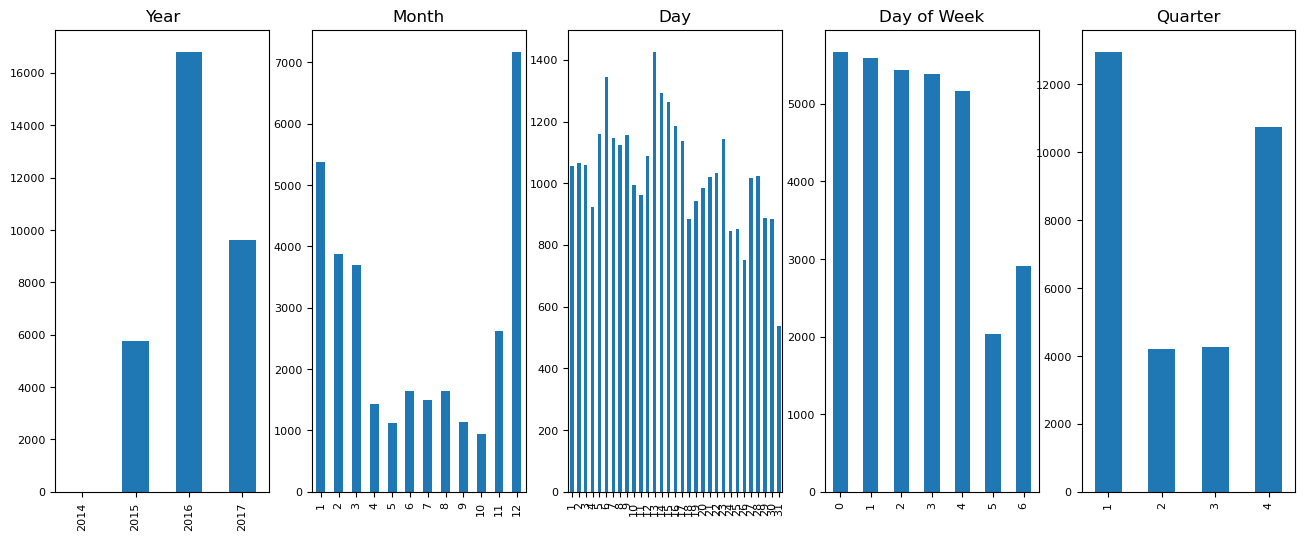

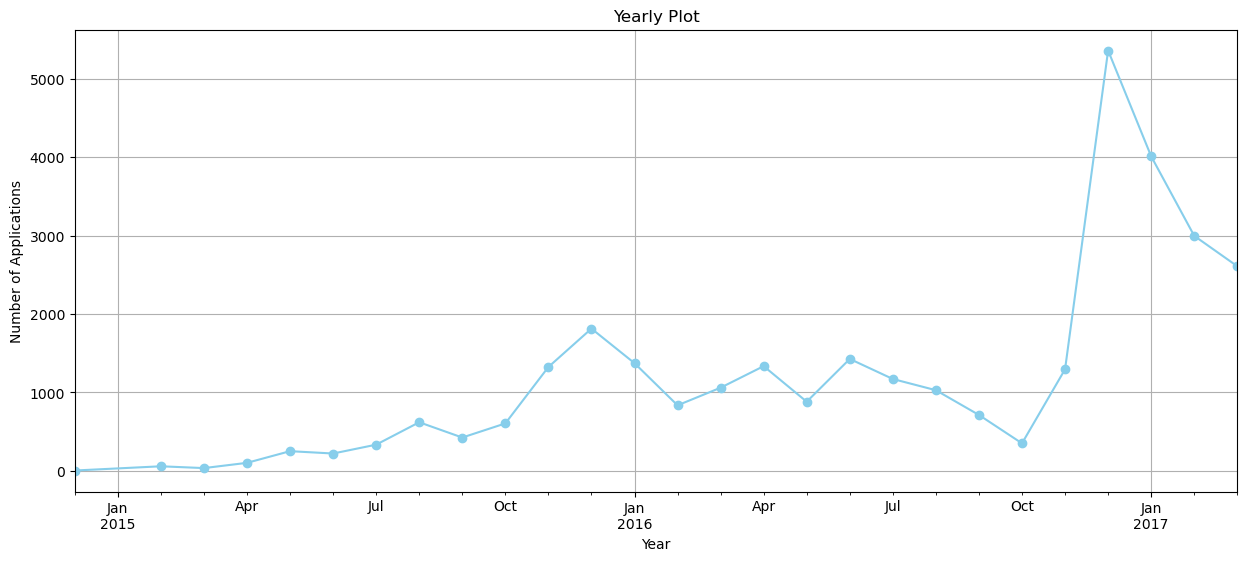

In [22]:
plot_time_frame(filter_data1, 'originatedDate')
plot_time_series(filter_data1,'originatedDate')

**Observations** : The analysis of the `originatedDate` variable, considering various time-related components, offers valuable insights that align with the patterns observed in the `applicationDate` variable. Here's an elaboration on the observations made from the variable analysis:

1. **Yearly Patterns** :
   - **Consistency with `applicationDate`:** The yearly plot of `originatedDate` mirrors the patterns observed in the `applicationDate` variable. This alignment reaffirms the logical sequence of loan origination following the submission of loan applications. It supports the understanding that loan origination dates naturally follow the dates of application submissions, highlighting the inherent chronological flow in the lending process.

2. **Weekly Patterns** :
   - **Sunday Discrepancy** : An interesting deviation is noted in the weekly patterns. Unlike the `applicationDate` variable, the `originatedDate` variable shows a higher number of loans being released on Sundays. This divergence from the typical workweek days (Monday to Friday) suggests a unique operational process or business strategy. It could indicate that MoneyLion works on Sunday to release the loan money as to avoid any potential reduction from customer satisfaction.

3. **Implications for Decision Making** :
   - **Operational Efficiency** : The observation of loans being originated on Sundays hints at MoneyLion's operational efficiency and strategic planning. Releasing loans on weekends might be a deliberate choice to provide applicants with immediate access to funds, especially during weekends when traditional banking services may be limited.
   - **Customer-Centric Approach** : Aligning loan origination with weekends demonstrates a customer-centric approach, catering to applicants' preferences and ensuring timely access to financial resources. This strategy can enhance customer satisfaction and build trust among applicants, fostering positive relationships with MoneyLion.

4. **Alignment with Business Logic** :
   - **Sequential Logic** : The fact that `originatedDate` follows the same sequential pattern as `applicationDate` validates the logical flow of the lending process. It affirms that the origination of loans logically follows the submission and approval of loan applications, reinforcing the credibility and integrity of the dataset's temporal information.

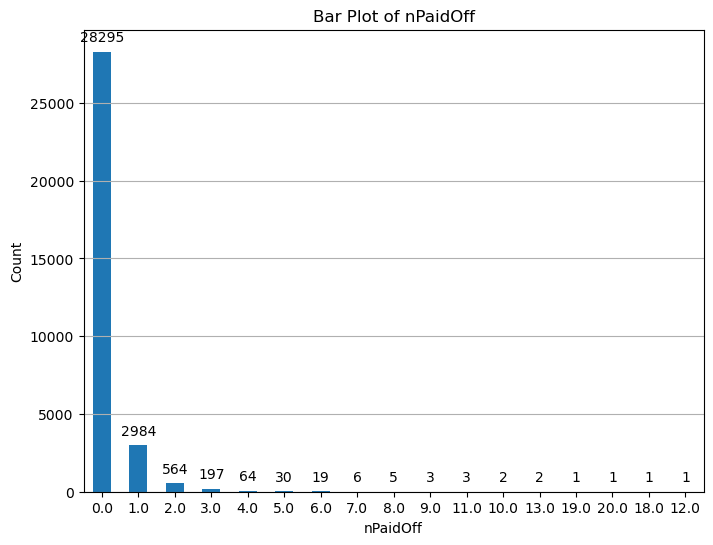

In [23]:
plot_discrete_variable(filter_data1, 'nPaidOff',0)

**Observations** : This variable provides insights into the loan repayment history of MoneyLion clients. The data indicates that a significant majority of applicants, totaling 28,295 observations, have not paid off any loans in the past.

**Analysis** : This observation raises important questions about the reasons behind this trend. Understanding why such a large number of applicants haven't paid off previous loans is crucial for making informed decisions moving forward. Possible factors contributing to this scenario could include financial challenges, economic conditions, or issues related to the loan terms and repayment structures. Investigating these factors in detail is essential before making any further decisions, as it can inform strategies to support applicants in managing their financial obligations and improve the overall loan repayment rates. Additionally, addressing the underlying causes can lead to the development of tailored financial solutions and support systems, enhancing the chances of successful loan repayment for future applicants.

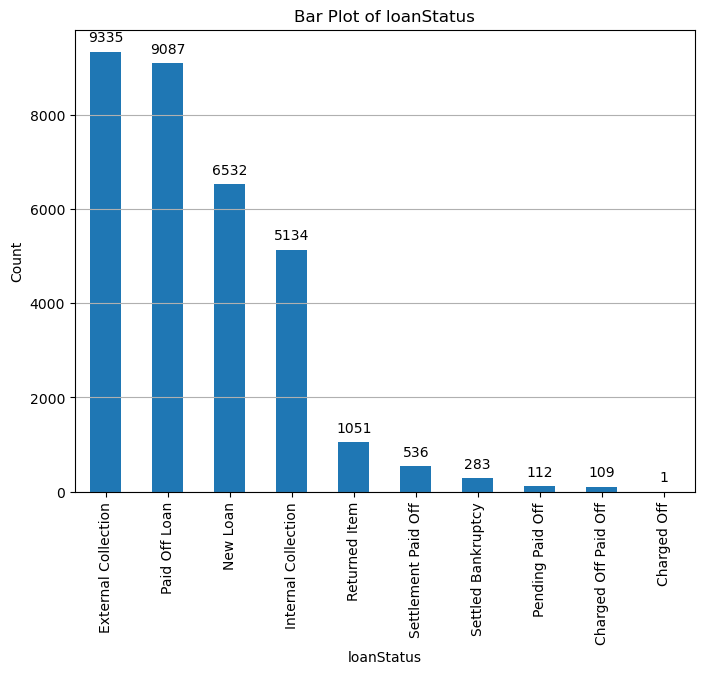

In [24]:
plot_discrete_variable(filter_data1,'loanStatus',90)

**Observations** : This dataset provides valuable information regarding the loan status of all applicants. It is evident that a significant portion of applicants fall into categories such as external collection, paid off loan, new loan, and internal collection, collectively constituting more than half of the applicants' statuses. Additionally, there is a noteworthy presence of applicants categorized as charged off, settlement pending paid off, and customer voided new loan.

**Analysis** : Understanding the diverse loan statuses among applicants is essential for assessing the overall health of the lending portfolio. Applicants falling into categories like external collection and charged off might require special attention in terms of follow-up and risk management strategies. Conversely, applicants who have successfully paid off their loans or are seeking new loans represent positive outcomes, reflecting the effectiveness of the lending process. By analyzing these different statuses, MoneyLion can tailor their approaches, focusing on improving collections for overdue accounts and fostering positive customer experiences for those successfully completing their loan agreements or seeking new opportunities. This nuanced understanding enables lenders to make informed decisions, optimizing their loan management processes and enhancing customer satisfaction.

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Mean    :  656.2684431323804
Var     :  246386.50836862344
Skew    :  3.1998160947156817
Kurt    :  12.158780653123596
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


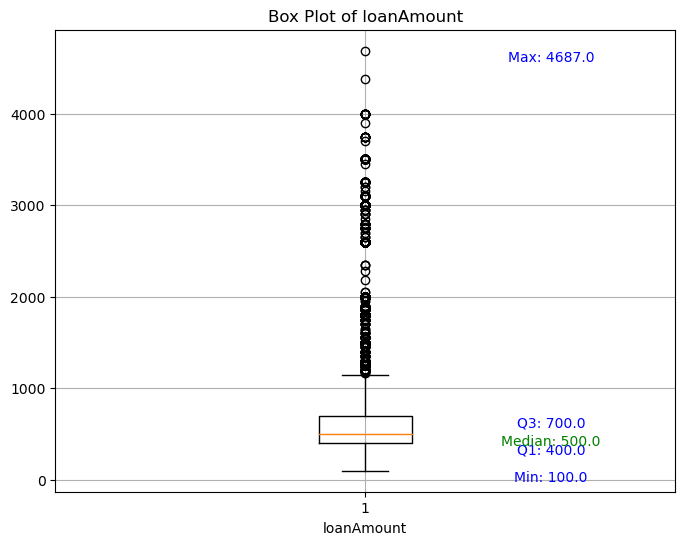

In [25]:
plot_box_plot(filter_data1,'loanAmount')

**Observations** : This variable reveals the information about the loan amount that applicants held. Noted from the boxplot above that there exist a number of outliers at the end of the boxplot. We can clearly observed that this variable has a big number of variance, illustrating that the loan amount are widely spread out from the mean, suggesting a large range of loan amounts. The skewness of 3.2 indicates a highly positive skew, demonstrating the distribution of loan amount is skewed to the right, with a long tail on the higher loan amounts side. This suggests that there are few loans with very high amounts that are pulling the distribution into a positive direction. Meanwhile, the kurtosis value of 12.16 is considered high. It shows that the distribution has a heavy tail and a very sharp prak compared to normal distribution. In practical terms, a high kurtosis such as `loanAmount` variable suggests that there are outliers in the dataset. In this case, our initial observation from the boxplot is evidenced, indicating that very large loan amounts that deviate significantly from the rest of the data.

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Mean    :  1804.740435849208
Var     :  1726903.0102886457
Skew    :  3.0576227329240933
Kurt    :  12.52788999693735
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


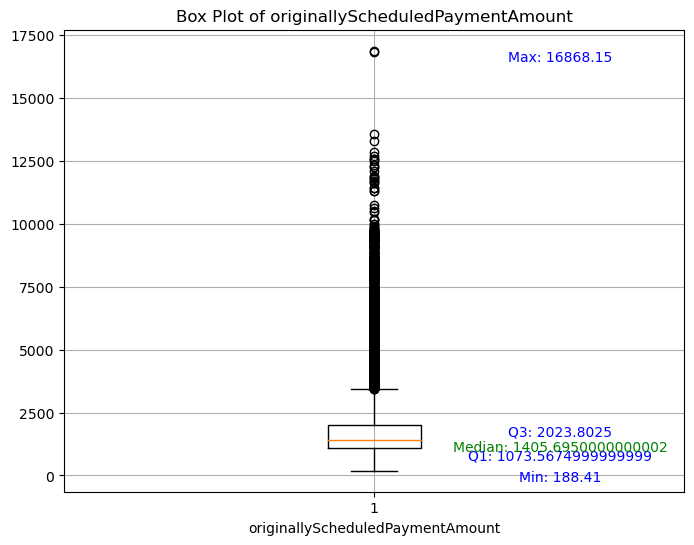

In [26]:
plot_box_plot(filter_data1,'originallyScheduledPaymentAmount')

**Observations** : Having the same characteristics as *loan amount* variable early, this variable reveals the information of originally scheduled repayment amount. 

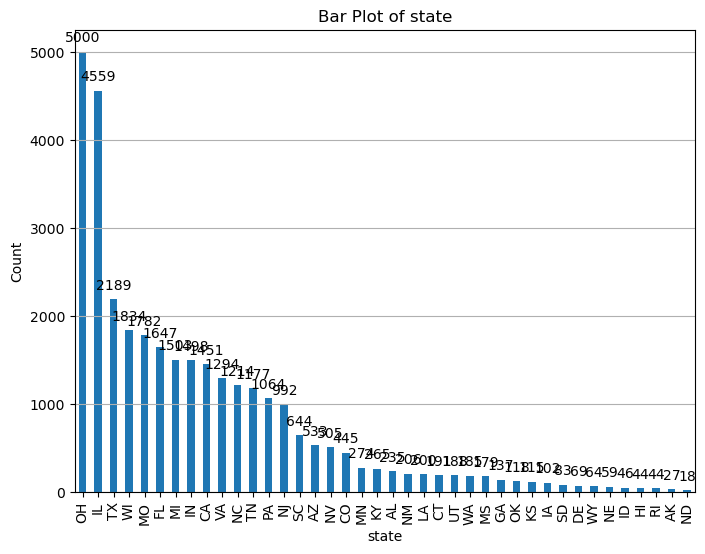

In [27]:
plot_discrete_variable(filter_data1,'state',90)

**Observations** : This variable provides insights into the geographic distribution of applicants based on their states. It is noteworthy that the majority of applicants originate from Ohio (OH), Illinois (IL), and Texas (TX), making these states the top three sources of applicants. Conversely, states like Rhode Island (RI), Alaska (AK), and North Dakota (ND) have the fewest applicants.

**Analysis** : Understanding this regional variation is crucial for designing an effective marketing strategy. By targeting regions with a high number of applicants, such as OH, IL, and TX, marketing efforts can be tailored to cater to the preferences and needs of the applicants in these states. Conversely, special attention can be given to regions with lower applicant numbers, like RI, AK, and ND, to explore ways to increase outreach and engagement, potentially tapping into untapped markets. This data-driven approach enables MoneyLion to optimize their marketing efforts and enhance their outreach to potential applicants across different states.

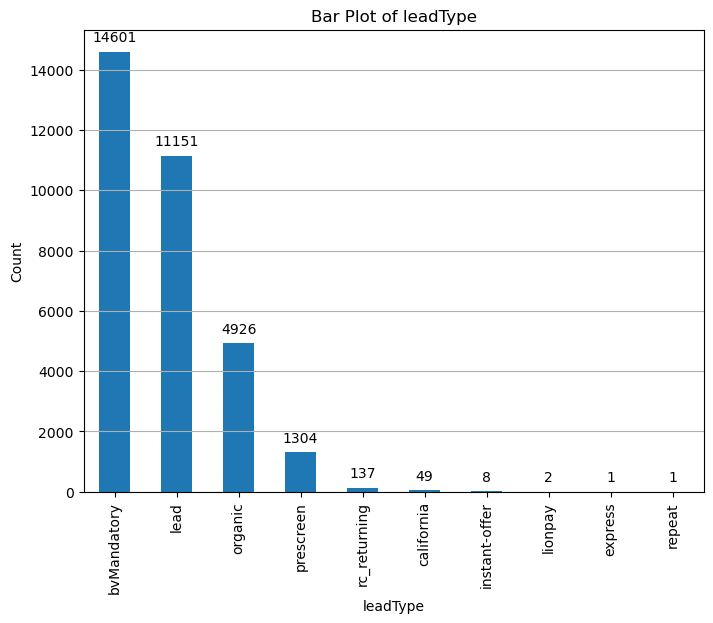

In [28]:
plot_discrete_variable(filter_data1,'leadType',90)

**Observations** : This variable provides important details about lead types, which play a pivotal role in establishing underwriting rules for leads in the lending process. The selection of lead types significantly influences the assessment and approval criteria for each lead.

**Analysis** : Examining the data reveals that the most common loan lead types are dominated by bvMandatory, lead, and organic. These prevalent lead types likely have specific underwriting guidelines and criteria tailored to them. On the other hand, there are only a few applicants categorized under the repeat and lionpay lead types, indicating their comparatively limited occurrence.

Understanding the distribution of lead types is crucial for MoneyLion when devising underwriting strategies. By recognizing the prevalence of certain lead types, MoneyLion can tailor their underwriting rules, risk assessment, and approval processes to align with these popular categories. Meanwhile, the presence of less common lead types highlights the need for specialized underwriting approaches for these cases.

Additionally, identifying the infrequent lead types, such as repeat and express, provides an opportunity for us to explore potential reasons behind their limited occurrence. This analysis can lead to targeted efforts in marketing, outreach, or product customization to increase engagement among applicants falling under these specific lead types. By adapting underwriting rules and strategies based on the prevalence and nature of lead types, MoneyLion can optimize their lending processes, enhance customer experiences, and ultimately improve the overall efficiency and effectiveness of our services.

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Mean    :  13.785954008701056
Var     :  459.3500202365246
Skew    :  3.572512795165249
Kurt    :  19.69015916801639
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


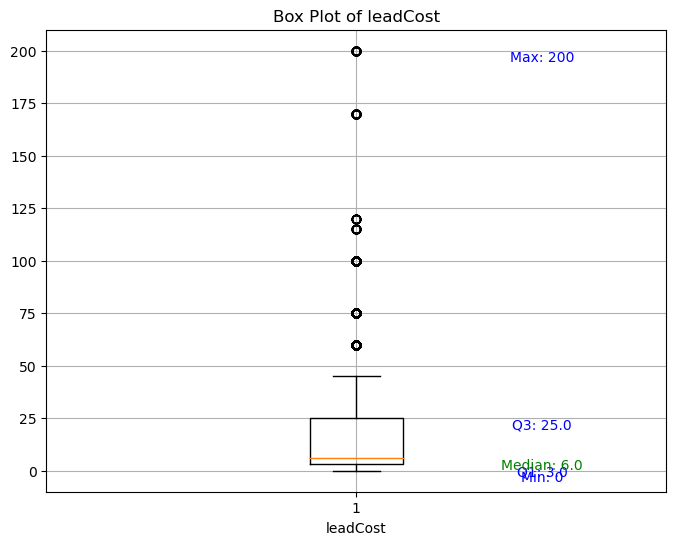

In [29]:
plot_box_plot(filter_data1,'leadCost')

**Observations** : The presented variable represents the cost associated with leads. On average, the cost per lead is approximately 13.79. Considering the relatively high variance of 459.35, it suggests that while there is some fluctuation in lead costs, the observations tend to cluster around the mean, indicating a moderate variation.

**Analysis** : The average cost per lead provides a baseline for evaluating the expenses incurred in acquiring leads. The variance, although significant, suggests that the costs do not deviate drastically from the mean, indicating a certain level of consistency or predictability in lead acquisition expenditures.

However, the high positive skewness of 3.57 implies that the distribution of lead costs is skewed to the right. This indicates that there are a few instances where lead costs are substantially higher than the mean, pulling the distribution in the positive direction. Such skewness highlights the presence of outliers or exceptionally expensive leads that contribute to the overall rightward skew of the data.

Moreover, the high positive kurtosis of 19.69 indicates that the distribution of lead costs has very heavy tails and an extremely sharp peak compared to a normal distribution. This signifies that the dataset contains a substantial number of outliers with exceptionally high costs, making the distribution more peaked and the tails much heavier than a typical distribution.

Understanding these statistical properties is crucial for budgeting and financial planning. While the average cost provides a general overview, the skewness and kurtosis highlight the presence of outliers, emphasizing the importance of identifying and managing these high-cost leads. By recognizing and addressing these outliers, MoneyLion can refine their lead acquisition strategies, optimize their budget allocation, and improve the overall efficiency of their marketing efforts.

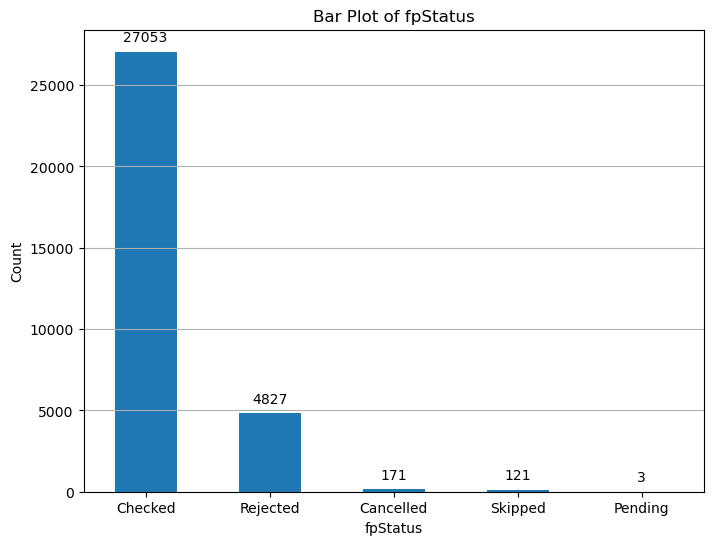

In [30]:
plot_discrete_variable(filter_data1,'fpStatus',0)

**Observations** : The provided variable represents the outcomes of the first payment made toward the loan. The data indicates that the majority of loans are checked or rejected during this initial payment assessment. However, there are specific instances classified as special cases, including skipped payments, cancelled transactions, pending statuses, and returned payments.

**Analysis** : Understanding the outcomes of the first loan payment is crucial for evaluating the efficiency and accuracy of the payment processing system. The prevalence of checked and rejected payments underscores the importance of rigorous validation procedures to maintain the integrity of the lending process. Identifying and rectifying the reasons for rejection can enhance the overall payment approval rates, ensuring a smoother experience for applicants.

Moreover, the presence of special cases such as skipped, cancelled, pending, and returned payments highlights the need for further investigation. These unique scenarios might arise due to specific circumstances, technical glitches, or human errors. Investigating these cases in detail allows MoneyLion to implement targeted solutions, reducing the occurrence of such exceptions in future loan transactions.

Additionally, recognizing the diversity of payment outcomes underscores the importance of having a flexible and adaptive payment processing system. By accommodating various payment statuses and addressing exceptional cases promptly, MoneyLion can further enhance customer satisfaction, streamline payment procedures, and maintain the trust of applicants throughout the loan repayment process.

### In short ...
From the analysis above, several data issues have been identified, including **missing values**, **outliers** and **naming convention discrepancies**. 

**Missing Values** :
Missing values can occur for various reasons, such as data entry errors, system glitches, or incomplete information during data collection. When handling missing values, it's essential to assess the extent of missing data for each variable. Depending on the proportion of missing values, there are several strategies to consider:

1. **Imputation:** Missing values can be estimated or imputed using statistical methods. Common imputation techniques include mean, median, or regression imputation, where missing values are replaced with estimated values based on other available data.

2. **Exclusion:** If the missing data is limited to a small portion of the dataset, excluding those records might be a viable option. However, this should be done carefully to avoid bias in the analysis.

3. **Domain Knowledge:** In some cases, domain experts can provide insights to impute missing values accurately, especially when dealing with specific variables or fields.

**Outliers** :
Outliers are data points significantly different from the rest of the dataset. They can arise due to errors, natural variations, or exceptional circumstances. Managing outliers is crucial to prevent skewed analyses and misleading conclusions. Here are common approaches to handling outliers:

1. **Visual Inspection:** Data visualization tools like box plots, histograms, or scatter plots can help identify outliers visually. Observing the data distribution can provide insights into potential outliers.

2. **Statistical Methods:** Statistical techniques like the Interquartile Range (IQR) or Z-scores can be used to identify and remove outliers based on their deviation from the mean or median.

3. **Transformations:** Applying transformations like logarithms can sometimes normalize the data and reduce the impact of outliers on statistical analyses.

4. **Contextual Understanding:** Understanding the domain and the specific variables in the dataset is crucial. Outliers might actually represent significant events or rare occurrences in certain contexts and may need to be treated differently.

**Naming Convention Discrepancies** :
It refers to inconsistencies or non-standardized ways in which variables, columns, or other identifiers are named. Such errors can occur due to various reasons, including different naming styles used by different contributors, lack of clear guidelines, or oversight during data collection or preprocessing. 

1. **Standardization:** Define and enforce a consistent naming convention across all variables. This convention should cover capitalization, word separation (e.g., 1 versus True), and the use of abbreviations or acronyms.

2. **Documentation:** Clearly document the chosen naming convention to ensure that all team members follow the guidelines. Include examples and explanations for clarity.

3. **Data Cleaning:** If inconsistencies exist in the dataset, consider cleaning the variable names to adhere to the standardized convention. This may involve renaming columns in databases or restructuring variable names in programming scripts.

Addressing these data issues requires careful consideration of the dataset's characteristics and the objectives of the analysis. Proper handling of missing values and outliers ensures the accuracy and reliability of the insights drawn from the data, providing a solid foundation for informed decision-making in the context of loans and lending processes.

### C. Error Handling

**C1. Missing Values Handling**

In [31]:
percent_missing = filter_data1.isnull().sum() * 100 / len(filter_data1)
sorted_percent_missing = percent_missing.sort_values(ascending=False)
print(sorted_percent_missing)

clearfraudscore                     0.285892
fpStatus                            0.015538
nPaidOff                            0.006215
loanStatus                          0.000000
hasCF                               0.000000
leadCost                            0.000000
leadType                            0.000000
state                               0.000000
originallyScheduledPaymentAmount    0.000000
loanAmount                          0.000000
loanId                              0.000000
anon_ssn                            0.000000
approved                            0.000000
originatedDate                      0.000000
originated                          0.000000
applicationDate                     0.000000
apr                                 0.000000
payFrequency                        0.000000
isFunded                            0.000000
dtype: float64


**Observation and Analysis** :

When analyzing a dataset, it's important to assess the presence of missing values in the variables, as these gaps in the data can impact the accuracy and reliability of our analysis. In the dataset above, the following variables have missing values:

1. `clearfraudscore` : This variable has a relatively high percentage of missing values, approximately 0.2859%. When a substantial portion of data is missing, it can raise concerns about the representativeness of the available data. The missing values in 'clearfraudscore' may be due to various reasons, such as technical issues during data collection or certain cases where the fraud score couldn't be determined.

2. `fpStatus` : Around 0.0155% of the values in this variable are missing. While this percentage is lower than that of `clearfraudscore`, it's still important to investigate the missing values. The reason behind missing data in `fpStatus` could be specific to the nature of the variable or the data collection process.

3. `nPaidOff` : This variable has a relatively low percentage of missing values, approximately 0.0062%. Even though the percentage is small, it's essential to understand why these values are missing. Identifying the cause of missing data in `nPaidOff` can provide insights into the data collection procedure or potential issues with the variable itself.

Dealing with missing data involves careful consideration. Depending on the context and the extent of missing values, we might choose to handle them in various ways, such as imputation (filling in missing values with estimates), excluding rows with missing values, or considering the missingness as a separate category if it carries significance in the analysis.

Before proceeding with any analysis or modeling, it's crucial to decide on an appropriate strategy for handling missing data based on the specific requirements of our analysis and the domain knowledge. This ensures that our analysis is accurate and reliable, providing meaningful insights from the available data. Therefore, in the subsequent step, we will examine the three mentioned variables individually to identify optimal solutions for addressing the missing values.

1. `clearfraudscore` Variable

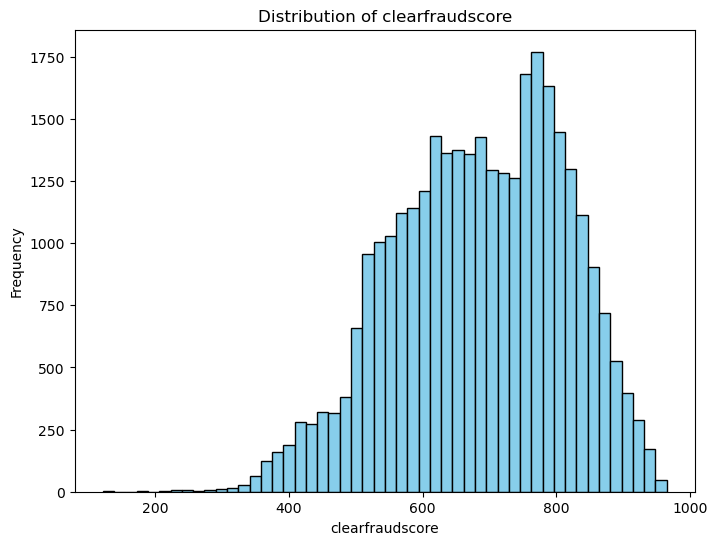

In [32]:
plot_variable_distribution(filter_data1, 'clearfraudscore')

**Observations** : We notice that the data exhibits a slight normal distribution with a skewness to the left, indicating that the median value holds significance in this context. This suggests that the central tendency of the data is best represented by the median, making it a valuable measure for our analysis. [Reference Link](https://medium.com/analytics-vidhya/appropriate-ways-to-treat-missing-values-f82f00edd9be)

In [33]:
temp = filter_data1.copy()

In [34]:
temp.loc[temp['clearfraudscore'].isna(),'clearfraudscore'] = temp['clearfraudscore'].median()

2. `fpStatus` Variable

In this context, the variable `fpStatus` in the dataset has a very small proportion of missing values, accounting for only 0.015538% of the total data. When dealing with a small percentage of missing values like this, one approach is to simply remove the rows containing those missing values. This strategy is feasible when the missing data is negligible compared to the overall dataset size, as dropping a small fraction of rows won't significantly impact the analysis. [Reference Link](https://medium.com/analytics-vidhya/appropriate-ways-to-treat-missing-values-f82f00edd9be)


In [35]:
temp.dropna(subset=['fpStatus'], inplace=True)

In [36]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32175 entries, 0 to 36333
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   loanId                            32175 non-null  object        
 1   anon_ssn                          32175 non-null  object        
 2   payFrequency                      32175 non-null  object        
 3   apr                               32175 non-null  float64       
 4   applicationDate                   32175 non-null  datetime64[ns]
 5   originated                        32175 non-null  bool          
 6   originatedDate                    32175 non-null  datetime64[ns]
 7   nPaidOff                          32173 non-null  float64       
 8   approved                          32175 non-null  bool          
 9   isFunded                          32175 non-null  int64         
 10  loanStatus                        32175 non-nu

**Observations** : Consequently, there is only remained `nPaidOff` variable consists of a few missing values. 

3. `nPaidOff` Variable

From observation above, the choice to drop the two rows with missing values for the nPaidOff variable was made to ensure data accuracy, simplify the data processing steps, and maintain the dataset's integrity for subsequent analyses.

In [37]:
temp.dropna(subset=['nPaidOff'], inplace=True)

In [38]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32173 entries, 0 to 36333
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   loanId                            32173 non-null  object        
 1   anon_ssn                          32173 non-null  object        
 2   payFrequency                      32173 non-null  object        
 3   apr                               32173 non-null  float64       
 4   applicationDate                   32173 non-null  datetime64[ns]
 5   originated                        32173 non-null  bool          
 6   originatedDate                    32173 non-null  datetime64[ns]
 7   nPaidOff                          32173 non-null  float64       
 8   approved                          32173 non-null  bool          
 9   isFunded                          32173 non-null  int64         
 10  loanStatus                        32173 non-nu

In summary, after addressing missing values in all rows, the dataset now comprises a complete set of 32,173 observations.

**C2. Naming Convention Discrepancies**

In the dataset analysis, a significant issue regarding naming convention discrepancies has been identified. Specifically, the variables `originated` and `approved` are represented using the Boolean values **True** or **False**, while the `isFunded` variable uses numerical values **1** or **0**.

To maintain consistency and improve data integrity, it is imperative to standardize the representation of these variables. The logical approach is to transform `originated` and `approved` variables to align with the numerical format used in `isFunded`.

**Proposed Standardization** :

1. **`originated` Variable**
   - **Current Format:** True/False
   - **Proposed Transformation:** Convert True to 1 and False to 0. This ensures consistency with the numerical representation used in `isFunded`.

2. **`approved` Variable**
   - **Current Format:** True/False
   - **Proposed Transformation:** Convert True to 1 and False to 0, aligning with the numerical format of `isFunded`.

By standardizing the representation of these variables, the dataset will exhibit uniformity, enhancing clarity and simplifying data processing and analysis. This standardized format will facilitate accurate comparisons, calculations, and modeling tasks, ensuring that the dataset adheres to a cohesive naming convention for these specific variables.

In [39]:
temp['originated'] = temp['originated'].astype(int)

In [40]:
temp['approved'] = temp['approved'].astype(int)

In [41]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32173 entries, 0 to 36333
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   loanId                            32173 non-null  object        
 1   anon_ssn                          32173 non-null  object        
 2   payFrequency                      32173 non-null  object        
 3   apr                               32173 non-null  float64       
 4   applicationDate                   32173 non-null  datetime64[ns]
 5   originated                        32173 non-null  int64         
 6   originatedDate                    32173 non-null  datetime64[ns]
 7   nPaidOff                          32173 non-null  float64       
 8   approved                          32173 non-null  int64         
 9   isFunded                          32173 non-null  int64         
 10  loanStatus                        32173 non-nu

In [42]:
temp.head(10)

loanId                          anon_ssn payFrequency     apr  \
0  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.00   
1  LL-I-17826953  7529d29c9d943cc55bc71a85d9c6b7a3            W  645.00   
2  LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c            S  490.00   
3  LL-I-17491287  bc9fa73468acf18cb968a3a6a3c4697c            S  490.00   
4  LL-I-15679301  bc9fa73468acf18cb968a3a6a3c4697c            S  490.00   
5  LL-I-12500318  bc9fa73468acf18cb968a3a6a3c4697c            S  490.00   
6  LL-I-11506719  10cefd11d41612b032fd9cd2debe32dc            B  590.00   
7  LL-I-18309774  10cefd11d41612b032fd9cd2debe32dc            B  159.00   
8  LL-I-09279047  1d249e27292d25e4d3b4bc142a2a4aea            W  404.10   
9  LL-I-10219067  1d249e27292d25e4d3b4bc142a2a4aea            W  381.65   

          applicationDate  originated          originatedDate  nPaidOff  \
0 2016-01-19 22:07:36.778           1 2016-01-20 15:49:18.846       0.0   
1 2017-03-01 15:55:41.823           1 2017-03-01 16:15:13.016       0.0   
2 2017-01-31 17:48:17.381           1 2017-01-31 18:00:14.520       2.0   
3 2017-02-21 17:20:23.671           1 2017-02-21 17:45:11.088       3.0   
4 2017-01-18 01:16:24.941           1 2017-01-18 01:30:16.712       1.0   
5 2016-12-05 06:19:59.756           1 2016-12-05 06:45:04.331       0.0   
6 2016-08-27 09:08:05.442           1 2016-08-29 15:05:04.014       0.0   
7 2017-03-13 03:55:39.599           1 2017-03-13 21:15:16.293       1.0   
8 2016-05-25 03:05:18.849           1 2016-05-25 15:11:36.260       3.0   
9 2016-07-08 16:31:13.341           1 2016-07-08 21:28:07.169       4.0   

   approved  isFunded     loanStatus  loanAmount  \
0         1         1  Paid Off Loan      3000.0   
1         1         1       New Loan       400.0   
2         1         1  Paid Off Loan      1250.0   
3         1         1  Paid Off Loan      1250.0   
4         1         1  Paid Off Loan       500.0   
5         1         1  Paid Off Loan       500.0   
6         1         1  Paid Off Loan       800.0   
7         1         1       New Loan      2600.0   
8         1         1  Paid Off Loan       300.0   
9         1         1  Paid Off Loan       350.0   

   originallyScheduledPaymentAmount state     leadType  leadCost fpStatus  \
0                           6395.19    CA    prescreen         0  Checked   
1                           1364.87    NJ         lead        40  Checked   
2                           3313.78    MO      organic         0  Checked   
3                           3112.16    MO      organic         0  Checked   
4                           1292.09    MO      organic         0  Checked   
5                           1271.81    MO  bvMandatory         6  Checked   
6                           2432.08    CA  bvMandatory        10  Checked   
7                           8116.01    CA      organic         0  Checked   
8                            422.64    WI      organic         0  Checked   
9                            492.90    WI      organic         0  Checked   

   hasCF  clearfraudscore  
0      1            879.0  
1      1            658.0  
2      1            835.0  
3      1            835.0  
4      1            835.0  
5      1            835.0  
6      1            624.0  
7      1            624.0  
8      1            770.0  
9      1            770.0

In brief, after correcting the naming convention error, a uniform and consistent naming pattern is now observed across all variables.

### D. Target Variable Treatment 

Proceeding with analysis, the next objective is to establish a target variable that signifies whether a specific loan application has experienced a default or not. To accomplish this, we direct our attention to the `loanStatus` column, which provides a broad perspective on the outcomes of each application.

**Rationale**

- **Objective for Creating a Target Variable:** The primary goal at this stage of the analysis is to create a target variable that can be used for predictive modeling. This target variable will help in categorizing loan applications into two distinct groups: those that have experienced a default and those that have not.

- **Utilizing the `loanStatus` Column:** The `loanStatus` column contains valuable information about the overall status or outcome of each loan application. It serves as a key indicator that allows us to categorize the applications into meaningful groups based on their repayment status.

- **Default Classification:** By examining the information within the `loanStatus` column, we can define a criterion or rule to classify loan applications as either "defaulted" or "not defaulted.", or simply words : **"1"** or **"0"**. This classification is essential for various types of analyses and modeling tasks related to loan risk assessment and prediction.

- **Importance of Target Variable:** The target variable, which signifies loan defaults, is a crucial component in the context of risk assessment and decision-making. It helps in understanding and predicting loan default patterns, which are essential for effective risk management in the financial industry.

In [43]:
normalized_counts = temp['loanStatus'].value_counts(normalize=True) * 100

# Display the normalized counts
print(normalized_counts)

External Collection     28.996363
Paid Off Loan           28.241072
New Loan                20.302738
Internal Collection     15.957480
Returned Item            3.266714
Settlement Paid Off      1.665993
Settled Bankruptcy       0.879620
Pending Paid Off         0.348118
Charged Off Paid Off     0.338793
Charged Off              0.003108
Name: loanStatus, dtype: float64


**Analysis** : Below are my own analysis and assumptions made for each unique value counts: 

- `External Collection` (29%) : In the context of loan default, it refers to the process where a MoneyLion outsources the task of collecting overdue or defaulted loan payments to a third-party collection agency. In the case of predicting a loan default / quality of applicants, this does not suits the objective. Thus, we could **exclude** this as our target variable consideration. 
- `Paid Off Loan` (28.24%) : In the context of loan default, it refers to a situation where an applicant has successfully repaid the entire outstanding loan amount as per the agreed terms and conditions outlined in the loan agreement. As our objective of this modeling, this served the purpose of it. Thus, we could **include** this as our target variable consideration.
- `New Loan` (20.30%) : In the context of loan default, it refers to a new applicant of loan from MoneyLion. As it does not related to the default risk of applicants where borrowing and lending are yet to taken place, we could **exclude** this from our target variable consideration.
- `Internal Collection` (15.96%) : In the context of loan default, it refers to the process through which a MoneyLion handles the collection of overdue or defaulted loan payments internally, without involving external third-party agencies. In our prediction model of whether the loan will be defaulted, this element showed of how the loan is being collected. Importantly, it showed a method of collection, rather than defaulting a loan. Thus, we could **exclude** this from our target variable consideration.
- `Returned Item` (3.27%) : In the context of loan default, it refers to the loan applicants that have missed 1 payment (but not more), due to insufficient funds. For this consideration, we could **exclude** this from our target variable consideration. The rationale behind it is that we want to make sure that the predicted accuracy of all applicants has the financial capability in repaying the loan on a timely manner. 
- `Settlement Paid Off` (1.67%) : In the context of loan default, it refers to the applicants has fully settled any outstanding loan amount. It is related to our target variables as these are data that applicants have no default risk on loan. Thus, we could **include** it. 
- `Settled Backruptcy` (0.88%) : In the context of loan default, it refers to the loan applicants have decleared backruptcy and have no financial ability to repay the loan. Such element is ultimately related to our prediction model's objective. Thus, we could **include** it from our target variable considerations.
- `Pending Paid Off` (0.35%): In the context of loan default, it indicates a loan status where the applicant has fulfilled most of their payment obligations, and the loan is in the process of being paid off completely. However, there might be some remaining payments or final steps required before the loan is officially marked as "Paid Off.". Thus, in our modelling objective, we could **exclude** from our target variable considerations as we only want an accurate model that predict the loan will be defaulted or not.
- `Charged Off Paid Off` (0.34%) : In the context of loan default, it can be a complex term that refers to a specific scenario where a charged-off loan. Thus, for the simplicity of the model, we could **exclude** this elements. 
- `Charged Off` (0.0031%) : In the context of loan default, it refers to a status assigned to a loan by MoneyLion when the applicant has failed to make payments for an extended period, and there is little expectation of recovering the full amount owed. Thus, it showed that the applicants has failed to fultill their financial obligations. Thus, we could **include** this in our target variable consideration.

In short, 

**Elements** 
| Included | Excluded |
| --- | --- | 
| `Paid Off Loan` | `External Collection` | 
| `Settlement Paid Off` | `New Loan` | 
| `Settled Backruptcy` | `Internal Collection` | 
| `Charged Off` | `Returned Item` |
|  | `Pending Paid Off` |
|  | `Charged Off Paid Off` |

____

**Target Variable** 
| Default ( 1 )| No Default ( 0 )|
| --- | --- | 
| `Settled Backruptcy` | `Paid Off Loan` | 
| `Charged Off` | `Settlement Paid Off` | 

By employing this approach, we can generate a fresh target column in the dataset, assigning binary values to indicate the favorability of the `loanStatus`. A value of 1 represents a loan default outcome, while 0 signifies a non-default outcome. All other entries in the dataset will be excluded from this target column, streamlining the data for analysis.

In [44]:
temp['target'] = temp['loanStatus'].map(target_mapping)

In [45]:
# Drop rows with no target label (implying their status is ongoing)
temp = temp[temp['target'].notna()].reset_index(drop=True)

In [46]:
normalized_counts = temp['target'].value_counts(normalize=True) * 100

# Display the normalized counts
print(normalized_counts)

0.0    97.133051
1.0     2.866949
Name: target, dtype: float64


**Observations** : The target variable distribution shown above indicates a significant imbalance in the dataset. In this context, an imbalanced dataset means that the classes (0 and 1) in the target variable are not represented equally. Let's break down the provided distribution:

- **Class 0 (Favorable Outcome):** The target value 0 accounts for approximately 97.13% of the dataset. This suggests that a vast majority of the instances in the dataset belong to the class indicating an favorable outcome (such as loan has no default or any other positive event).

- **Class 1 (Unfavorable Outcome):** On the other hand, the target value 1 represents only about 2.87% of the dataset. This class signifies a unfavorable outcome (like default loan repayment or a negative event), and it is significantly underrepresented compared to class 0.

**Analysis** :

1. **Imbalanced Data:** Having such a substantial disparity between the two classes (favorable and unfavorable outcomes) creates an imbalanced dataset. Imbalanced data can impact the performance of machine learning models, particularly those designed to predict rare events or minority classes. In this case, predicting class 1 accurately becomes challenging due to its scarcity in the dataset.

2. **Challenges in Modeling:** When dealing with imbalanced data, machine learning models might exhibit a bias towards the majority class. This means the model could become overly optimized for predicting the majority class (class 0), making it less effective at identifying instances of the minority class (class 1). As a result, the model's ability to recognize favorable outcomes could be compromised.

3. **Addressing Imbalance:** To mitigate the effects of class imbalance, techniques like oversampling the minority class, undersampling the majority class, or using algorithms specifically designed for imbalanced data (such as SMOTE - Synthetic Minority Over-sampling Technique) can be employed. These techniques help balance the class distribution and improve the model's ability to predict both classes accurately.

4. **Careful Evaluation:** When evaluating the model's performance, metrics like precision, recall, F1-score, and area under the ROC curve (AUC-ROC) are often used instead of accuracy. These metrics provide a more comprehensive understanding of the model's ability to correctly predict both classes, considering the class imbalance.

In [47]:
temp.drop(columns = ['loanStatus'],inplace = True)

**Rationale** : At this point, it's evident that we can safely remove the `loanStatus` column from the dataset. This decision is made possible because we have successfully extracted and condensed all the essential information from loanStatus into the newly created target variable.

### E. Variable Manipulation

**E1. Drop `hasCF` Variable**

**Rationale** : I have decided to exclude the `hasCF` column from our analysis for a couple of reasons. Firstly, the instructions provided did not offer any specific information about the content or purpose of this column. Secondly, considering the likelihood that "CF" stands for "clear fraud," it is reasonable to assume that the essential information contained in `hasCF` is already covered by the `clearfraudscore` column. Our assumption here is that the underwriting team likely rejected most fraudulent applications, making `clearfraudscore` a comprehensive indicator.

However, it's important to note that in a real-world scenario, it is advisable to seek clarification or confirmation before excluding any data attribute from consideration. Clarity about the data's meaning and relevance is crucial to making informed decisions during the analysis process.

In [48]:
temp.drop(columns = ['hasCF'],inplace = True)

In [49]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9906 entries, 0 to 9905
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   loanId                            9906 non-null   object        
 1   anon_ssn                          9906 non-null   object        
 2   payFrequency                      9906 non-null   object        
 3   apr                               9906 non-null   float64       
 4   applicationDate                   9906 non-null   datetime64[ns]
 5   originated                        9906 non-null   int64         
 6   originatedDate                    9906 non-null   datetime64[ns]
 7   nPaidOff                          9906 non-null   float64       
 8   approved                          9906 non-null   int64         
 9   isFunded                          9906 non-null   int64         
 10  loanAmount                        9906 non-null 

**E2. Add `durationTime` Variable**

**Rationale** : Upon conducting a comprehensive examination of each variable, a noteworthy insight emerged. Specifically, there is potential in deriving a significant feature by calculating the difference between the `applicationDate` and `originatedDate` variables. This calculated feature serves as a valuable indicator, offering insights into the duration – whether measured in hours or days – that a loan application took from the initial application stage to its origination. 

1. **Relevance as a Predictor** : This time-based feature holds substantial relevance when it comes to predicting the risk profile of loan applicants. The duration from application to origination can provide crucial insights into the efficiency and promptness of the lending process. Longer durations might indicate delays or complexities in the approval process, potentially reflecting higher risks associated with the applicant or the application itself. Detail evidence is required to be investigate as supporting materials. 

2. **Potential Use in Modeling** : Integrating this derived feature into predictive models can enhance their accuracy and effectiveness. By considering the time taken for loan processing as a predictor, MoneyLion can refine their risk assessment models. This, in turn, enables them to make more informed decisions, optimizing the approval process and ensuring a more streamlined and efficient lending operation.

In [50]:
temp['durationTime'] = (temp['originatedDate'] - temp['applicationDate']).dt.total_seconds() / 3600

In [51]:
temp.head(10)

loanId                          anon_ssn payFrequency     apr  \
0  LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.00   
1  LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c            S  490.00   
2  LL-I-17491287  bc9fa73468acf18cb968a3a6a3c4697c            S  490.00   
3  LL-I-15679301  bc9fa73468acf18cb968a3a6a3c4697c            S  490.00   
4  LL-I-12500318  bc9fa73468acf18cb968a3a6a3c4697c            S  490.00   
5  LL-I-11506719  10cefd11d41612b032fd9cd2debe32dc            B  590.00   
6  LL-I-09279047  1d249e27292d25e4d3b4bc142a2a4aea            W  404.10   
7  LL-I-10219067  1d249e27292d25e4d3b4bc142a2a4aea            W  381.65   
8  LL-I-07272718  1d249e27292d25e4d3b4bc142a2a4aea            W  449.99   
9  LL-I-10413611  bc500677542783c43842d54e34830f08            B  324.00   

          applicationDate  originated          originatedDate  nPaidOff  \
0 2016-01-19 22:07:36.778           1 2016-01-20 15:49:18.846       0.0   
1 2017-01-31 17:48:17.381           1 2017-01-31 18:00:14.520       2.0   
2 2017-02-21 17:20:23.671           1 2017-02-21 17:45:11.088       3.0   
3 2017-01-18 01:16:24.941           1 2017-01-18 01:30:16.712       1.0   
4 2016-12-05 06:19:59.756           1 2016-12-05 06:45:04.331       0.0   
5 2016-08-27 09:08:05.442           1 2016-08-29 15:05:04.014       0.0   
6 2016-05-25 03:05:18.849           1 2016-05-25 15:11:36.260       3.0   
7 2016-07-08 16:31:13.341           1 2016-07-08 21:28:07.169       4.0   
8 2016-02-16 17:21:44.967           1 2016-02-16 18:21:59.369       1.0   
9 2016-07-21 16:06:26.718           1 2016-07-21 17:10:56.462       1.0   

   approved  isFunded  loanAmount  originallyScheduledPaymentAmount state  \
0         1         1      3000.0                           6395.19    CA   
1         1         1      1250.0                           3313.78    MO   
2         1         1      1250.0                           3112.16    MO   
3         1         1       500.0                           1292.09    MO   
4         1         1       500.0                           1271.81    MO   
5         1         1       800.0                           2432.08    CA   
6         1         1       300.0                            422.64    WI   
7         1         1       350.0                            492.90    WI   
8         1         1       500.0                            726.77    WI   
9         1         1      1250.0                           2581.47    IL   

      leadType  leadCost fpStatus  clearfraudscore  target  durationTime  
0    prescreen         0  Checked            879.0     0.0     17.695019  
1      organic         0  Checked            835.0     0.0      0.199205  
2      organic         0  Checked            835.0     0.0      0.413171  
3      organic         0  Checked            835.0     0.0      0.231047  
4  bvMandatory         6  Checked            835.0     0.0      0.417938  
5  bvMandatory        10  Checked            624.0     0.0     53.949603  
6      organic         0  Checked            770.0     0.0     12.104836  
7      organic         0  Checked            770.0     0.0      4.948286  
8      organic         0  Checked            770.0     0.0      1.004001  
9      organic         0  Checked            932.0     0.0      1.074929

**E3. Add `duration_from_last` Variable**

**Rationale** : After a thorough investigation of each variable, a significant observation came to light. Specifically, there is potential in creating a meaningful feature by calculating the time difference in days between the dates of former and subsequent loan applications. This calculation provides valuable information about the duration between consecutive applications, potentially influencing the risk profile. However, it's crucial to conduct further analysis and gather supporting statistical evidence to validate these findings. For fair treatment, a value of "-1" should be awarded to those non-returning clients indicating they do not apply any new loan after the last application.

In [52]:
temp = temp.sort_values(by = ['anon_ssn', 'applicationDate']).copy()

In [53]:
temp['duration_from_last'] = temp.groupby('anon_ssn')['applicationDate'].diff().dt.total_seconds() / (24 * 60 * 60)

In [54]:
temp['duration_from_last'] = temp['duration_from_last'].fillna(-1)

In [55]:
temp

loanId                          anon_ssn payFrequency    apr  \
7600  LL-I-13612582  00006b47f484731c95b4c11a42f9c2e3            B  645.0   
5320  LL-I-10308424  00069c6c4fa5fa1b94b845ffde8e081b            W  360.0   
8472  LL-I-12250877  000c0aa9b221e0ca8bb76dfd55d3847c            S  590.0   
4539  LL-I-09394172  00166d34c1276616154d830a9ef2f620            B  590.0   
6501  LL-I-05743901  0019a85f11c8d85805ea90b4deb461a4            B  360.0   
...             ...                               ...          ...    ...   
6709  LL-I-09345602  ffdf8cca26a3364a57dd42c55aa88b69            B  324.0   
6710  LL-I-09770357  ffdf8cca26a3364a57dd42c55aa88b69            M  324.0   
1828  LL-I-11169363  fff10bad3cc5bb482c50388aacb047f0            M  590.0   
5433  LL-I-08701976  fff409842c197bd4804aadba0838d90c            W  650.0   
4700  LL-I-18535621  fffa10032c34c5c03e76b208dc664f70            S  490.0   

             applicationDate  originated          originatedDate  nPaidOff  \
7600 2016-12-21 02:57:57.321           1 2016-12-21 03:15:05.820       0.0   
5320 2016-07-15 20:19:00.936           1 2016-07-15 21:15:51.841       0.0   
8472 2016-11-28 15:14:54.192           1 2016-11-28 16:34:33.602       1.0   
4539 2016-05-30 19:58:51.102           1 2016-05-30 21:14:33.128       0.0   
6501 2015-12-15 14:55:26.232           1 2015-12-15 20:19:29.015       0.0   
...                      ...         ...                     ...       ...   
6709 2016-05-27 15:58:17.443           1 2016-05-30 14:06:29.465       1.0   
6710 2016-06-16 21:10:15.243           1 2016-06-17 14:24:32.429       2.0   
1828 2016-08-16 19:01:24.719           1 2016-08-17 18:23:55.122       0.0   
5433 2016-04-14 13:33:54.581           1 2016-04-14 21:45:44.533       1.0   
4700 2017-03-17 01:48:51.748           1 2017-03-17 02:00:09.397       0.0   

      approved  isFunded  loanAmount  originallyScheduledPaymentAmount state  \
7600         1         1       500.0                           1728.52    KY   
5320         1         1       300.0                            670.49    IL   
8472         1         1       600.0                           1699.35    CT   
4539         1         1       700.0                           2040.27    NV   
6501         1         1       500.0                            996.44    IL   
...        ...       ...         ...                               ...   ...   
6709         1         1       300.0                            600.16    IL   
6710         1         1      1350.0                           2691.91    IL   
1828         1         1       500.0                           1327.28    WI   
5433         1         1       400.0                           1350.68    MI   
4700         1         1       500.0                           1299.24    MO   

          leadType  leadCost  fpStatus  clearfraudscore  target  durationTime  \
7600          lead        10   Checked            736.0     0.0      0.285694   
5320   bvMandatory         3   Checked            545.0     0.0      0.947474   
8472  rc_returning         0   Checked            872.0     0.0      1.327614   
4539   bvMandatory        10   Checked            708.0     0.0      1.261674   
6501   bvMandatory         6   Checked            818.0     0.0      5.400773   
...            ...       ...       ...              ...     ...           ...   
6709       organic         0   Checked            837.0     0.0     70.136673   
6710       organic         0  Rejected            837.0     0.0     17.238107   
1828   bvMandatory         3   Checked            722.0     0.0     23.375112   
5433       organic         0   Checked            811.0     0.0      8.197209   
4700          lead        25   Checked            766.0     0.0      0.188236   

      duration_from_last  
7600           -1.000000  
5320           -1.000000  
8472           -1.000000  
4539           -1.000000  
6501           -1.000000  
...                  ...  
6709          170.894771  
6

### F. Feature Selection

Feature selection, also known as variable selection or attribute selection, is a crucial step in data analysis and predictive modeling. It involves the automatic identification of attributes in our dataset that hold the utmost relevance in predicting the risk profile of a loan applicant. The primary objective is to discern and eliminate unnecessary, irrelevant, or redundant attributes from the dataset.

**Significance of Feature Selection**

1. **Enhancing Predictive Accuracy:** By selecting only the most relevant features, we optimize the accuracy and efficiency of our predictive models. Focusing on pertinent attributes ensures that the model concentrates on factors that genuinely influence the loan applicant's risk level.

2. **Avoiding Overhead:** Including redundant or irrelevant attributes can introduce noise into the model, leading to overfitting. Feature selection helps prevent this issue by filtering out unnecessary data, ensuring the model's focus is on meaningful patterns.

3. **Simplifying Interpretation:** A streamlined dataset with carefully chosen features simplifies the interpretation of the model's outcomes. Decision-makers can grasp the key factors affecting loan risk without unnecessary complexity.

**Challenges and Considerations**

1. **Domain Knowledge:** Effective feature selection often requires domain expertise to discern which attributes are truly relevant. Knowledge about the loan industry and the specific factors influencing loan approvals is invaluable.

2. **Techniques and Algorithms:** Various techniques, such as statistical tests, correlation analyses, or machine learning algorithms, can aid in feature selection. Choosing the appropriate method depends on the dataset's characteristics and the problem at hand.

3. **Iterative Process:** Feature selection is often an iterative process, evolving as the analysis progresses. Continuous evaluation and refinement of selected features can lead to more accurate predictive models.

Thus, a few methods are undertaken to improve the accuracy of the model.

**F1. Correlation Analysis**

**Rationale** : In the realm of data analysis, understanding correlations is vital. When we integrate highly correlated data into our model, it can lead to overfitting issues. For instance, if we encounter two features with significant correlations, we need to make a decision. It is essential to exclude the one that displays stronger correlation with other features. This careful selection ensures our model avoids the pitfalls of overfitting, enhancing its accuracy and reliability. Noted that correlation analysis only workable for numerical columns. Thus, we need to exclude those non-numerical columns for correlation analysis.

In [56]:
temp1 = temp[['apr','nPaidOff','loanAmount','originallyScheduledPaymentAmount','leadCost','clearfraudscore','target']]

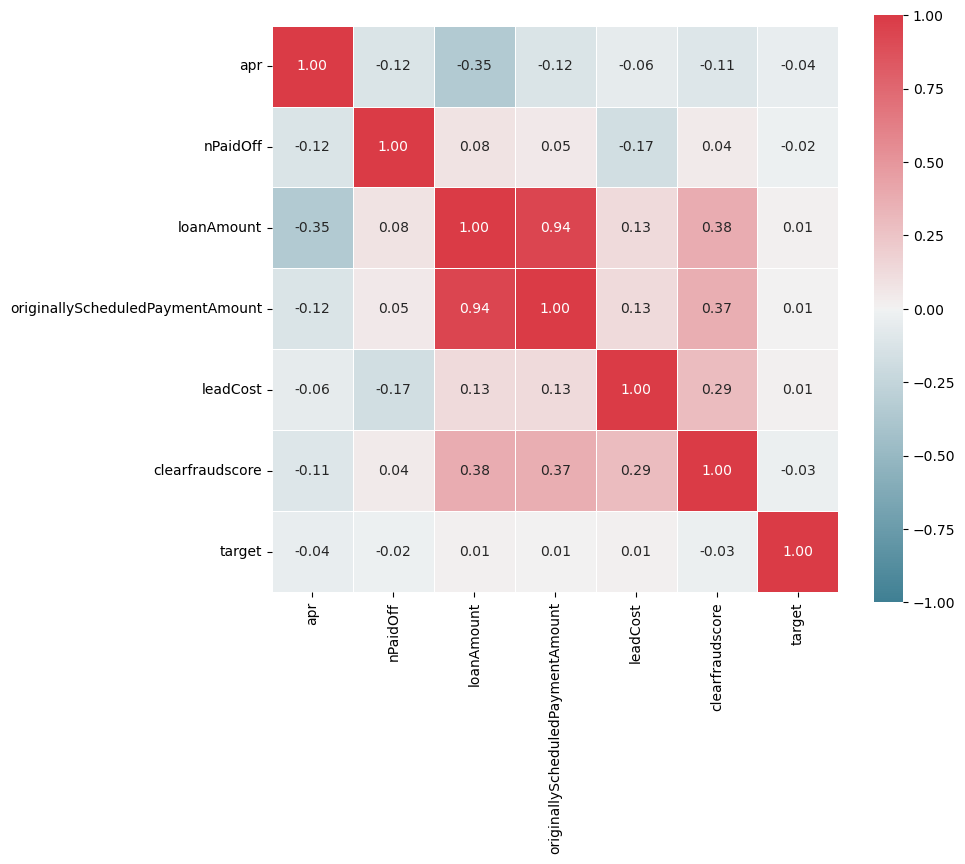

In [57]:
HeatMap(temp1,x=True)

**Observations** : Upon analyzing the provided heatmap, a notable observation is the high correlation coefficient of 0.94 between two variables, specifically `originallyScheduledPaymentAmount` and `loanAmount`. This correlation value signifies a strong positive linear relationship between these two variables. In simpler terms, as one variable increases, the other variable tends to increase proportionally, and vice versa.

**Analysis** : The correlation coefficient of 0.94 indicates a very strong positive correlation between `originallyScheduledPaymentAmount` and `loanAmount`. This suggests that there is a robust connection between the initially scheduled payment amount and the total loan amount. Changes in one variable are highly reflective of changes in the other, indicating a predictable pattern. As for now, there is no immediate cause for concern regarding multicollinearity among these two variables. However, if our model starts exhibiting signs of generating unreliable or unstable predictions, we may investigate the impact of multicollinearity. In such a scenario, the correlated features, in this case, `loanAmount` and `originallyScheduledPaymentAmount`, will be examined more closely. If necessary, and depending on the model's performance, a decision may be made to drop one of the two correlated features. This precautionary step aims to address multicollinearity issues and enhance the overall stability and reliability of the predictive model. Regular monitoring and diagnostic checks will guide us in making informed decisions regarding feature adjustments.

**F2. Drop `applicationDate` and `originatedDate` Variable**

**Rationale** : We continue the feature selection process by excluding `applicationDate` and `originatedDate` variable from our list of features. This decision is grounded in several justifications. Firstly, an examination of the data reveals no discernible or significant patterns in the application and originated dates. Secondly, there is no compelling reason to believe that these dates, in isolation, hold predictive value for loan outcomes. Lastly, we have already consolidated relevant temporal information into `time_to_originate` and `time_since_last`, making the inclusion of the original date features redundant in our analysis.

In [58]:
temp.drop(columns=['applicationDate', 'originatedDate'], inplace=True)

### G. Discrete Variable Treatment

In [59]:
clean_data = temp.copy()

In [60]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9906 entries, 7600 to 4700
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loanId                            9906 non-null   object 
 1   anon_ssn                          9906 non-null   object 
 2   payFrequency                      9906 non-null   object 
 3   apr                               9906 non-null   float64
 4   originated                        9906 non-null   int64  
 5   nPaidOff                          9906 non-null   float64
 6   approved                          9906 non-null   int64  
 7   isFunded                          9906 non-null   int64  
 8   loanAmount                        9906 non-null   float64
 9   originallyScheduledPaymentAmount  9906 non-null   float64
 10  state                             9906 non-null   object 
 11  leadType                          9906 non-null   object 
 12  lea

**Observations and Analysis** : From the summary demonstrated above as pre-screening stage, we observe multiple columns identified as 'object' data type. Thus, it meant that those 'object' data type variables are discrete. We will handle them as follows:

- `loanId` and `anon_ssn` are unique identifiers and **require no additional action**, as they are the columns that accepts unique values for each row.
- `payFrequency` may hold significance, having unique few categorical data such as W,B,S,M,T, it **require further attention** for modeling purpose later.
- `loanStatus` will be dealt with during target variable creation and **require no additional action** as for now.
- `state` contains demographic data, in which it may affect the loan risk of an applicant. Thus, it **require further attention**.
- `leadType` may potentially affecting the loan risk prediction. Thus, without further analysis was taken place, it **require further attention**. 
- `fpStatus` contains data that won't be available during model prediction (target leakage), **leading to the decision to drop this column**. [Reference Link](https://towardsdatascience.com/data-leakage-in-machine-learning-how-it-can-be-detected-and-minimize-the-risk-8ef4e3a97562)

Therefore, in the subsequent step, we will examine the above-mentioned variables individually to identify optimal solutions for addressing the discrete variable for modeling.

**G1. `payFrequency` , `state`, `leadType` Variable**

**Rationale** : Considering that `payFrequency`, `state`, and `leadType` are categorical and nominal variables, representing unordered and mutually exclusive categories, label encoding is deemed suitable for transforming them into numerical representations. It is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. 

In [61]:
temp = clean_data.copy()

In [62]:
temp

loanId                          anon_ssn payFrequency    apr  \
7600  LL-I-13612582  00006b47f484731c95b4c11a42f9c2e3            B  645.0   
5320  LL-I-10308424  00069c6c4fa5fa1b94b845ffde8e081b            W  360.0   
8472  LL-I-12250877  000c0aa9b221e0ca8bb76dfd55d3847c            S  590.0   
4539  LL-I-09394172  00166d34c1276616154d830a9ef2f620            B  590.0   
6501  LL-I-05743901  0019a85f11c8d85805ea90b4deb461a4            B  360.0   
...             ...                               ...          ...    ...   
6709  LL-I-09345602  ffdf8cca26a3364a57dd42c55aa88b69            B  324.0   
6710  LL-I-09770357  ffdf8cca26a3364a57dd42c55aa88b69            M  324.0   
1828  LL-I-11169363  fff10bad3cc5bb482c50388aacb047f0            M  590.0   
5433  LL-I-08701976  fff409842c197bd4804aadba0838d90c            W  650.0   
4700  LL-I-18535621  fffa10032c34c5c03e76b208dc664f70            S  490.0   

      originated  nPaidOff  approved  isFunded  loanAmount  \
7600           1       0.0         1         1       500.0   
5320           1       0.0         1         1       300.0   
8472           1       1.0         1         1       600.0   
4539           1       0.0         1         1       700.0   
6501           1       0.0         1         1       500.0   
...          ...       ...       ...       ...         ...   
6709           1       1.0         1         1       300.0   
6710           1       2.0         1         1      1350.0   
1828           1       0.0         1         1       500.0   
5433           1       1.0         1         1       400.0   
4700           1       0.0         1         1       500.0   

      originallyScheduledPaymentAmount state      leadType  leadCost  \
7600                           1728.52    KY          lead        10   
5320                            670.49    IL   bvMandatory         3   
8472                           1699.35    CT  rc_returning         0   
4539                           2040.27    NV   bvMandatory        10   
6501                            996.44    IL   bvMandatory         6   
...                                ...   ...           ...       ...   
6709                            600.16    IL       organic         0   
6710                           2691.91    IL       organic         0   
1828                           1327.28    WI   bvMandatory         3   
5433                           1350.68    MI       organic         0   
4700                           1299.24    MO          lead        25   

      fpStatus  clearfraudscore  target  durationTime  duration_from_last  
7600   Checked            736.0     0.0      0.285694           -1.000000  
5320   Checked            545.0     0.0      0.947474           -1.000000  
8472   Checked            872.0     0.0      1.327614           -1.000000  
4539   Checked            708.0     0.0      1.261674           -1.000000  
6501   Checked            818.0     0.0      5.400773           -1.000000  
...        ...              ...     ...           ...                 ...  
6709   Checked            837.0     0.0     70.136673          170.894771  
6710  Rejected            837.0     0.0     17.238107           20.216641  
1828   Checked            722.0     0.0     23.375112           -1.000000  
5433   Checked            811.0     0.0      8.197209           -1.000000  
4700   Checked            766.0     0.0      0.188236           -1.000000  

[9906 rows x 18 columns]

In [63]:
label_encoder = preprocessing.LabelEncoder()

In [64]:
temp['payFrequency']= label_encoder.fit_transform(temp['payFrequency']) 

In [65]:
temp['state']= label_encoder.fit_transform(temp['state']) 

In [66]:
temp['leadType']= label_encoder.fit_transform(temp['leadType']) 

In [67]:
clean_data1 = temp.copy()
clean_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9906 entries, 7600 to 4700
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loanId                            9906 non-null   object 
 1   anon_ssn                          9906 non-null   object 
 2   payFrequency                      9906 non-null   int64  
 3   apr                               9906 non-null   float64
 4   originated                        9906 non-null   int64  
 5   nPaidOff                          9906 non-null   float64
 6   approved                          9906 non-null   int64  
 7   isFunded                          9906 non-null   int64  
 8   loanAmount                        9906 non-null   float64
 9   originallyScheduledPaymentAmount  9906 non-null   float64
 10  state                             9906 non-null   int64  
 11  leadType                          9906 non-null   int64  
 12  lea

**Observations** : Thus, as shown from above cleaned data, we can observe that the variable `payFrequency`,`state`,`leadType` variables have transformed into numeric representative.

**G2. `fpStatus` Variable**

**Rationale** : From our analysis, understand that the `fpStatus` variable is quite similar to our target variable. In which, to avoid any data leakage in training the model, we decide to remove it.

In [68]:
temp = clean_data1.copy()

In [69]:
temp = temp.drop(columns = ['fpStatus'])

In [70]:
clean_data2 = temp.copy()
clean_data2.head(5)

loanId                          anon_ssn  payFrequency    apr  \
7600  LL-I-13612582  00006b47f484731c95b4c11a42f9c2e3             0  645.0   
5320  LL-I-10308424  00069c6c4fa5fa1b94b845ffde8e081b             4  360.0   
8472  LL-I-12250877  000c0aa9b221e0ca8bb76dfd55d3847c             3  590.0   
4539  LL-I-09394172  00166d34c1276616154d830a9ef2f620             0  590.0   
6501  LL-I-05743901  0019a85f11c8d85805ea90b4deb461a4             0  360.0   

      originated  nPaidOff  approved  isFunded  loanAmount  \
7600           1       0.0         1         1       500.0   
5320           1       0.0         1         1       300.0   
8472           1       1.0         1         1       600.0   
4539           1       0.0         1         1       700.0   
6501           1       0.0         1         1       500.0   

      originallyScheduledPaymentAmount  state  leadType  leadCost  \
7600                           1728.52     14         4        10   
5320                            670.49     11         0         3   
8472                           1699.35      4         8         0   
4539                           2040.27     25         0        10   
6501                            996.44     11         0         6   

      clearfraudscore  target  durationTime  duration_from_last  
7600            736.0     0.0      0.285694                -1.0  
5320            545.0     0.0      0.947474                -1.0  
8472            872.0     0.0      1.327614                -1.0  
4539            708.0     0.0      1.261674                -1.0  
6501            818.0     0.0      5.400773                -1.0

In [71]:
clean_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9906 entries, 7600 to 4700
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loanId                            9906 non-null   object 
 1   anon_ssn                          9906 non-null   object 
 2   payFrequency                      9906 non-null   int64  
 3   apr                               9906 non-null   float64
 4   originated                        9906 non-null   int64  
 5   nPaidOff                          9906 non-null   float64
 6   approved                          9906 non-null   int64  
 7   isFunded                          9906 non-null   int64  
 8   loanAmount                        9906 non-null   float64
 9   originallyScheduledPaymentAmount  9906 non-null   float64
 10  state                             9906 non-null   int64  
 11  leadType                          9906 non-null   int64  
 12  lea

## Step 4 : Modeling

The following screenshot offers an overview of the methodology employed during the modeling phase.

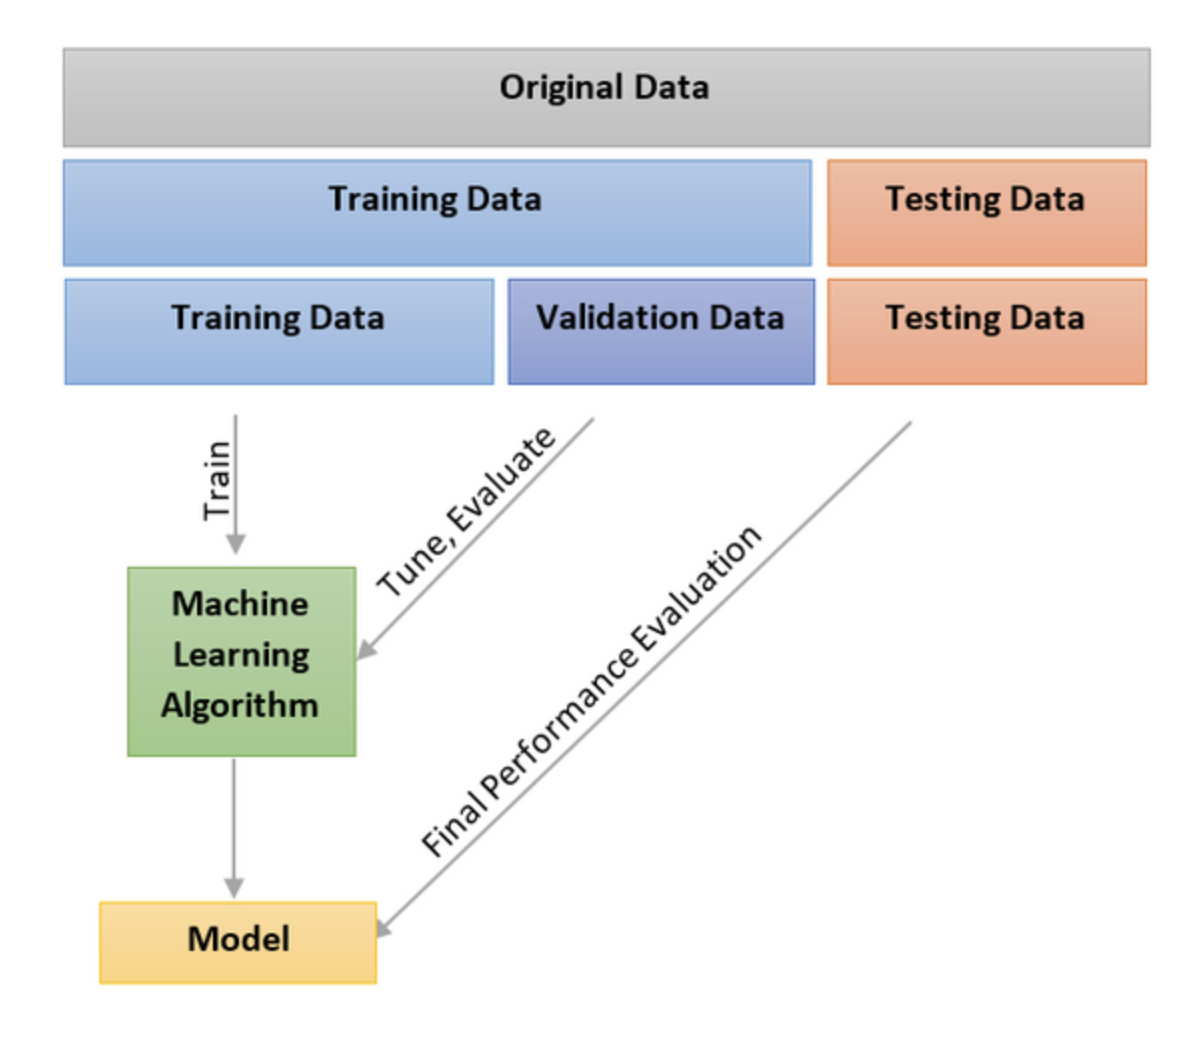

Typically, data is partitioned into a training set and a test set, with the test set left untouched until the final stage of model evaluation. Subsequently, the training set is further divided into training and validation sets, with the validation set utilized for model tuning.

The conventional train-test approach is susceptible to the high variance test problem, wherein alterations to the test set can lead to fluctuations in prediction outcomes. To mitigate this issue, we employ the k-fold validation method within our training and validation sets. This involves dividing the training set into k subsets, training the model on k-1 subsets, and validating on the remaining subset. This process is repeated k times, ensuring each subset serves as the validation set exactly once. The results are then averaged, providing a more robust evaluation that diminishes the impact of variability associated with a single train-test split.

### Spot Check Algorithm

In the field of machine learning, the quest for improving models is perpetual. As data scientists and practitioners, our dedication lies in consistently refining the efficacy of our algorithms. Despite the allure of intricate and advanced models, it is crucial to recognize the effectiveness of linear algorithms. This subsession will delve into "spot-checking" algorithms and uncover its potential to yield noteworthy outcomes (Sadaf, 2023). As such, below presented our initial modeling steps and results. 

Below is a brief explanation of each model used in this project:

1. **Linear Discriminant Analysis (LDA)**
   - LDA is a classification algorithm that finds the linear combinations of features that best separate different classes in the dataset.
   - It focuses on maximizing the distance between the means of different classes while minimizing the spread within each class.

2. **Classification and Regression Tree (CART)**
   - CART is a decision tree algorithm that recursively splits the dataset based on the most significant feature, creating a tree structure for classification or regression tasks.
   - Each node in the tree represents a decision based on a specific feature.

3. **Naive Bayes (NB)**
   - NB is a probabilistic classification algorithm based on Bayes' theorem.
   - It assumes that the features are conditionally independent, simplifying the calculation of probabilities.

4. **Support Vector Machines (SVM)**
   - SVM is a powerful classification algorithm that works by finding the hyperplane that best separates different classes in the feature space.
   - It is effective in high-dimensional spaces and is versatile with different kernel functions.

5. **Ada Boost (AB)**
   - AB is an ensemble learning method that combines multiple weak learners to create a strong classifier.
   - It assigns different weights to misclassified instances, focusing on improving their classification in subsequent rounds.

6. **Gradient Boosting Machines (GBM)**
   - GBM is an ensemble learning technique that builds a series of decision trees sequentially.
   - Each tree corrects errors of the previous one, optimizing the model's performance over iterations.

7. **Random Forest (RF)**
   - RF is an ensemble learning method that constructs a multitude of decision trees at training time.
   - It outputs the mode of the classes for classification tasks or the mean prediction for regression tasks.

8. **Extra Tree (ET)**
   - ET is similar to Random Forest but builds decision trees with random thresholds for each feature.
   - It introduces extra randomness during the tree-building process.

9. **Neural Network (NN)**
   - NN is a computational model inspired by the human brain, consisting of layers of interconnected nodes (neurons).
   - It is capable of learning complex patterns and relationships in data.

These models were chosen to provide diversity and robustness in capturing patterns within the dataset, each with its unique strengths and characteristics.

In [72]:
temp = clean_data2.copy()
X = temp.drop(columns=['loanId','anon_ssn','target'])
Y = temp['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.25,
                                                    random_state=0,
                                                    stratify=temp['target'])

**Rationale:** It's important to highlight the use of the **stratify** parameter, which is employed to preserve the distribution of the train and test data, ensuring a fair and representative comparison. The dataset is divided into a 75-25 split for training and testing, a common ratio that has demonstrated effective performance in various articles. It's crucial to acknowledge that the dataset characteristics in those articles might differ from ours. [Reference Link](https://www.researchgate.net/publication/356969879_Deep_convolutional_neural_network-based_system_for_fish_classification)

LDA model: Mean (0.971329), Std (0.000614)
CART model: Mean (0.941714), Std (0.006999)
NB model: Mean (0.958541), Std (0.009684)
SVM model: Mean (0.971329), Std (0.000614)
AB model: Mean (0.971059), Std (0.000669)
GBM model: Mean (0.969713), Std (0.001829)
RF model: Mean (0.971329), Std (0.000614)
ET model: Mean (0.969040), Std (0.001702)
NN model: Mean (0.934720), Std (0.097865)


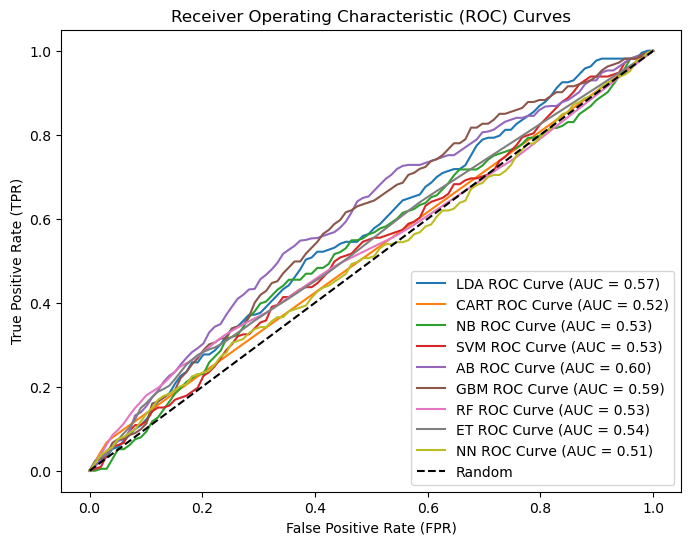

In [73]:
models = GetBasedModel()
names,results,roc_result = BasedLine2(X_train, y_train,models)

In [74]:
PlotBoxR().PlotResult(names,results)

In [75]:
basedLineScore = ScoreDataFrame(names,results,roc_result)
basedLineScore

Model   Score  ROC_Score
0   LDA  0.9713   0.566087
1  CART  0.9417   0.519506
2    NB  0.9585   0.534330
3   SVM  0.9713   0.529844
4    AB  0.9711   0.596704
5   GBM  0.9697   0.588402
6    RF  0.9713   0.531140
7    ET  0.9690   0.542776
8    NN  0.9347   0.511815

**Analysis** : Here are some comments on the statistical performance of spot-check models:

1. **Consistency vs. Discrimination**
   - Models like LDA, SVM, AB, and GBM demonstrate high accuracy with low variability. This indicates consistent performance across different cross-validation folds.
   - However, the discrimination capability (AUC) varies among these models, suggesting that while they are consistent, they may not effectively distinguish between classes.

2. **AUC Insights**
   - Models with AUC values around 0.5, such as CART and RF, indicate limited discrimination capabilities.
   - AUC values above 0.5 indicate better-than-random discrimination, with higher values indicating stronger discrimination power, such as LDA, GBM and AB.

3. **Trade-Offs**
   - The trade-off between accuracy, stability, and discrimination is crucial. While high accuracy is desirable, it should be interpreted alongside AUC and variability metrics.
   - Models with high accuracy but low AUC may excel in capturing the majority class while struggling with minority class predictions.
   
Focusing on a subset of models for further training and testing can help streamline the process and concentrate on the models that have shown promise based on accuracy or ROC score. Below is a summary:

1. **Linear Discriminant Analysis (LDA):**
   - Chosen for its high accuracy of 97.13% in the initial analysis.

2. **Support Vector Machines (SVM):**
   - Selected due to its high accuracy of 97.13% in the initial analysis.

3. **Ada Boost (AB):**
   - Retained for further evaluation based on its high accuracy of 97.11%.

4. **Random Forest (RF):**
   - Included for further examination due to its high accuracy of 97.13%.

5. **Gradient Boosting Machines (GBM):**
   - Retained based on its high ROC score of 58.84%.

Continuing with these models allows for a more focused and efficient analysis, enabling a deeper exploration of their performance characteristics. It's essential to balance the trade-off between accuracy and ROC score, as both metrics provide valuable insights into model performance.

In [76]:
basedLineScore = basedLineScore.drop([1,2,7,8])

### Feature Engineering

**Rationale** : The preprocessing of numerical features varies between tree-based and non-tree-based models, and the distinctions are as follows:

1. **General Approach**
   - **Tree-Based Models:** These models, such as decision trees and random forests, are generally insensitive to the scale of numerical features. Therefore, scaling is not a critical factor in their performance.
   - **Non-Tree-Based Models:** Models like linear regression or support vector machines often rely heavily on the scaling of numerical features for optimal performance. Thus, scaling is important influence in the performance of these models.

2. **Common Preprocessing Techniques**
   - **MinMax Scaler ([0,1])** : A commonly employed technique is MinMax scaling, which transforms the numerical features to a range between 0 and 1. This is particularly beneficial for non-tree-based models to ensure consistent scaling.
   - **Standard Scaler (Mean = 0, Std = 1)** : Another frequently used method is Standard Scaling, where the features are standardized to have a mean of 0 and a standard deviation of 1. This is crucial for non-tree models to mitigate the impact of different scales.
   - **Rank (Not applicable to this dataset)** : Although ranking is a preprocessing option, it is not utilized in this specific dataset. Ranking assigns a numerical value based on the order, which may be beneficial in certain scenarios.

Understanding and applying these preprocessing techniques are essential steps in optimizing the performance of machine learning models, aligning with the specific requirements of tree-based or non-tree-based algorithms. The choice of preprocessing methods depends on the characteristics of the dataset and the nature of the machine learning model being employed. Thus, only **MinMax Scaler** and **Standard Scaler** will be considered to be applied into our dataset for comparison.

`1. Standardize Normalization`

In [77]:
models = GetScaledModel('standard')

standard LDA model: Mean (0.971329), Std (0.000614)
standard SVM model: Mean (0.971329), Std (0.000614)
standard AB model: Mean (0.971059), Std (0.000669)
standard GBM model: Mean (0.969848), Std (0.001371)
standard RF model: Mean (0.971329), Std (0.000614)


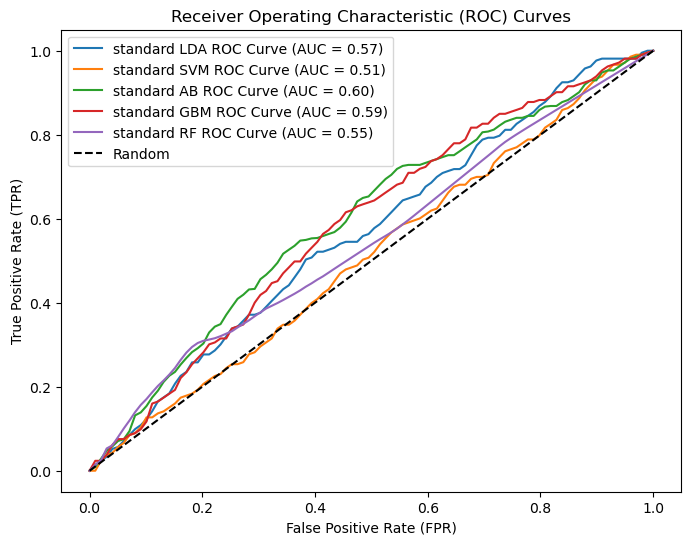

In [78]:
names,results,roc_result = BasedLine2(X_train, y_train,models)

In [79]:
PlotBoxR().PlotResult(names,results)

In [80]:
StandardScore = ScoreDataFrame(names,results,roc_result)
StandardScore

Model   Score  ROC_Score
0  standard LDA  0.9713   0.566087
1  standard SVM  0.9713   0.511795
2   standard AB  0.9711   0.596704
3  standard GBM  0.9698   0.588447
4   standard RF  0.9713   0.546802

**Analysis** : The table above provides insights into the performance of five different models, showcasing a remarkable consistency in accuracy. The mean accuracy across these models exhibits minimal variability, with the highest difference being 0.0013. This consistency indicates that the accuracy remains stable across different k-folds. However, it's crucial to acknowledge that the ROC score has not experienced a parallel improvement. This lack of improvement could be attributed to the imbalanced dataset, where the target variable is predominantly represented by class 0, constituting 97% of the entire dataset. The imbalance introduces a challenge in making accurate conclusions solely based on accuracy. 

It's essential to recognize the potential pitfalls of relying solely on accuracy, especially in the context of imbalanced data. Wrong assumptions stemming from an imbalanced dataset can lead to inaccurate conclusions. To address this, strategies for handling imbalanced data, such as SMOTE or the use of appropriate evaluation metrics, should be considered in subsequent steps of the analysis. This will ensure a more nuanced and accurate assessment of model performance.

`2. MinMax Normalization`

In [81]:
models = GetScaledModel('minmax')

minmax LDA model: Mean (0.971329), Std (0.000614)
minmax SVM model: Mean (0.971329), Std (0.000614)
minmax AB model: Mean (0.971194), Std (0.000656)
minmax GBM model: Mean (0.970387), Std (0.001342)
minmax RF model: Mean (0.971194), Std (0.000656)


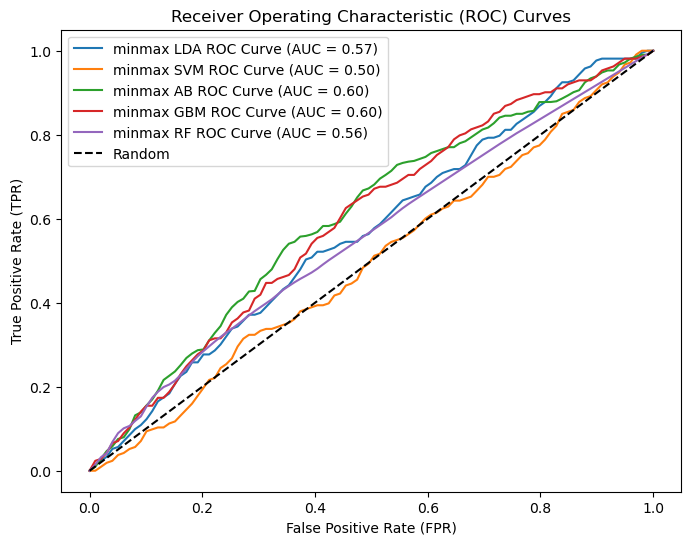

In [82]:
names,results,roc_result = BasedLine2(X_train, y_train,models)

In [83]:
PlotBoxR().PlotResult(names,results)

In [84]:
MinMaxScore = ScoreDataFrame(names,results,roc_result)
MinMaxScore

Model   Score  ROC_Score
0  minmax LDA  0.9713   0.566087
1  minmax SVM  0.9713   0.496019
2   minmax AB  0.9712   0.603339
3  minmax GBM  0.9704   0.596057
4   minmax RF  0.9712   0.555150

**Analysis** : The table and plots above showcases the accuracy and ROC score for the dataset normalized using the Min-Max technique. A consistent pattern is evident, mirroring the observations made with the standardized normalization dataset. In both cases, the models exhibit comparable accuracy values, indicating that the choice of normalization technique (either Min-Max or Standardization) has a limited impact on the overall predictive performance. This consistency across normalization methods suggests that the algorithms employed are robust and relatively insensitive to the specific scaling approach used.

It's noteworthy that while accuracy remains consistent, the ROC score, a metric particularly sensitive to class imbalances, also displays similar patterns. The impact of normalization on ROC scores aligns with expectations, as both techniques aim to maintain the relative relationships between feature values.

In short, the choice between Min-Max normalization and Standardization may depend on specific considerations such as the characteristics of the dataset, the nature of the features, and the preferences of the modeling algorithms. The analysis reaffirms the importance of assessing multiple metrics and considering the specific requirements of the problem at hand when making decisions about preprocessing techniques.

In [85]:
print(basedLineScore.mean(numeric_only = True))
print("_____________")
print(MinMaxScore.mean(numeric_only = True))
print("_____________")
print(StandardScore.mean(numeric_only = True))

Score        0.970940
ROC_Score    0.562436
dtype: float64
_____________
Score        0.971080
ROC_Score    0.563331
dtype: float64
_____________
Score        0.970960
ROC_Score    0.561967
dtype: float64


**Analysis** : Thus, based on the average accuracy and ROC score,  we decided to process the rest of the model training and testing with Min Max normalization. By choosing Min-Max normalization, we aim to maintain consistency in the preprocessing approach and evaluate the models under a standardized scaling method. This can be particularly beneficial for models that might be sensitive to the scale of input features. It's essential to monitor the impact of normalization on model performance, as different models may respond differently to various preprocessing techniques. Overall, this decision provides a systematic and standardized way to assess the chosen models.

`3. Class Imbalanced`

Class imbalance refers to a situation in a classification problem where the distribution of instances across different classes is not uniform. In other words, one or more classes have significantly fewer samples compared to others. This imbalance can introduce challenges in training machine learning models, especially when the minority class (the class with fewer instances) is of particular interest or importance. We can observe from our plot below in the `target` variable, where it showed a high imbalanced class in dependent variable

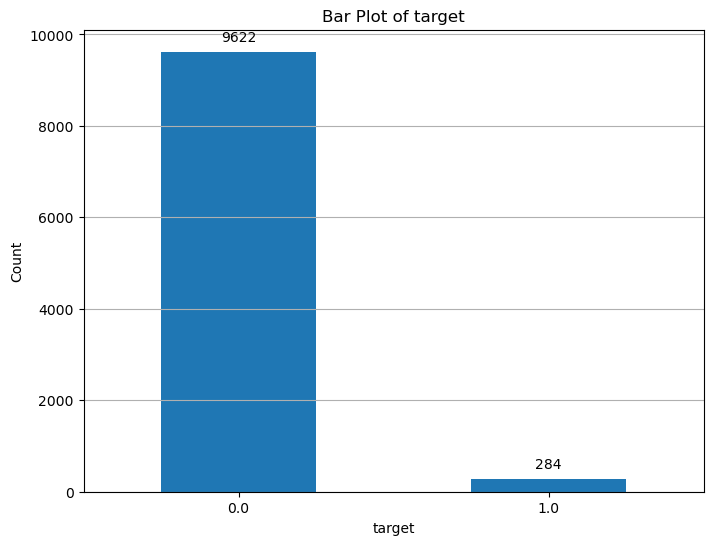

In [86]:
plot_discrete_variable(clean_data2,'target',0)

**Analysis** : Addressing class imbalance is crucial to ensure fair and accurate model performance, especially in situations where both classes are important. Thus, SMOTE (synthetic minority oversampling technique) is to be explored to elimite such issue. It is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [87]:
smote = SMOTE(sampling_strategy='auto', random_state=SEED)

In [88]:
temp = clean_data2.copy()
X = temp.drop(columns=['loanId','anon_ssn','target'],axis = 1)
Y = temp['target']

In [89]:
X_resampled, y_resampled = smote.fit_resample(X,Y)

In [90]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, 
                                                    y_resampled,
                                                    test_size=0.25,
                                                    random_state=0)

In [91]:
# Print class distribution before applying SMOTE
print("Class distribution before SMOTE:")
print("Class 0: {}".format(sum(y_train == 0)))
print("Class 1: {}".format(sum(y_train == 1)))

Class distribution before SMOTE:
Class 0: 7216
Class 1: 213


In [92]:
# Print class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print("Class 0: {}".format(sum(y_train_resampled == 0)))
print("Class 1: {}".format(sum(y_train_resampled == 1)))


Class distribution after SMOTE:
Class 0: 7234
Class 1: 7199


**Analaysis** : After implementing the Synthetic Minority Over-sampling Technique (SMOTE) to address the imbalanced dataset, a more equitable distribution between classes 0 and 1 is observed. This rebalancing of the dataset contributes to a more robust and fair representation of both classes, addressing the challenges posed by the initial imbalance.

Subsequently, the modeling process is continued with the application of Min-Max normalization techniques on the SMOTE-treated dataset. This combination aims to leverage the advantages of both approaches—SMOTE for handling imbalanced classes and Min-Max normalization for scaling features to a consistent range. The integration of SMOTE and Min-Max normalization is anticipated to enhance the model's performance by mitigating the impact of class imbalances and ensuring that features are uniformly scaled. This sets the stage for more reliable and accurate predictions, particularly in scenarios where imbalanced classes can significantly impact model training and evaluation.

In [93]:
models = GetScaledModel('minmax')

minmax LDA model: Mean (0.618583), Std (0.015577)
minmax SVM model: Mean (0.753759), Std (0.005713)
minmax AB model: Mean (0.819926), Std (0.009210)
minmax GBM model: Mean (0.897318), Std (0.008443)
minmax RF model: Mean (0.975404), Std (0.002756)


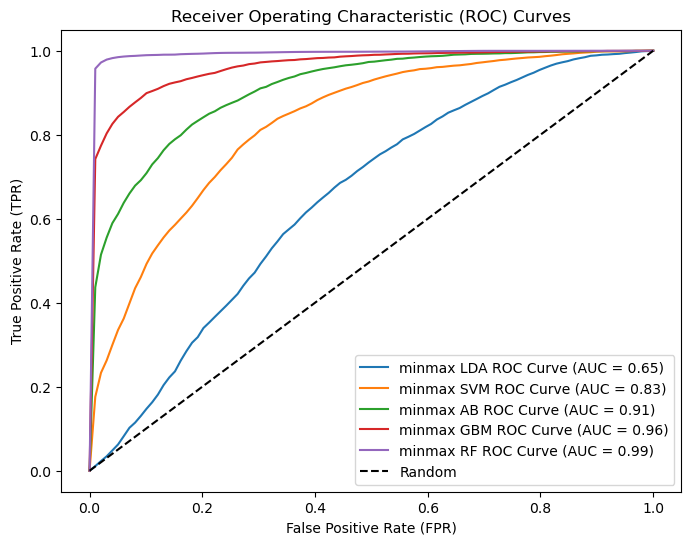

In [94]:
names,re_results,re_roc_result = BasedLine2(X_train_resampled, y_train_resampled,models)

In [95]:
PlotBoxR().PlotResult(names,re_results)

In [96]:
SMOTE_MinMax_baseline = ScoreDataFrame(names,re_results,re_roc_result)
SMOTE_MinMax_baseline

Model   Score  ROC_Score
0  minmax LDA  0.6186   0.650455
1  minmax SVM  0.7538   0.827655
2   minmax AB  0.8199   0.908750
3  minmax GBM  0.8973   0.961710
4   minmax RF  0.9754   0.990812

**Analysis** : Below are my analysis on each model with min-max normalization technique applied:

1. **LDA**
| | Imbalanced Dataset | SMOTE Balanced Dataset |
| --- | --- | ---|
| Accuracy | 97.13% | 61.86% |
| ROC Score | 56.61% | 65.05%|
  
     - LDA shows a significant drop in accuracy after applying SMOTE. However, the ROC score improves significantly, suggesting better discrimination.
___
2. **SVM**
| | Imbalanced Dataset | SMOTE Balanced Dataset |
| --- | --- | ---|
| Accuracy | 97.13% | 75.38% |
| ROC Score | 49.60% | 82.77%|
   
     - SVM shows a decrease in accuracy but an improvement in ROC score after applying SMOTE.
___
3. **AB**
| | Imbalanced Dataset | SMOTE Balanced Dataset |
| --- | --- | ---|
| Accuracy | 97.12% | 81.99% |
| ROC Score | 60.33% | 90.88%|
  
     - AB exhibits a decrease in accuracy but an improvement in ROC score with SMOTE.
___
4. **GBM**
| | Imbalanced Dataset | SMOTE Balanced Dataset |
| --- | --- | ---|
| Accuracy | 97.04% | 89.73% |
| ROC Score | 59.61% | 96.17%|
 
     - GBM shows a decrease in accuracy but an improvement in ROC score after applying SMOTE.
___
5. **RF**
| | Imbalanced Dataset | SMOTE Balanced Dataset |
| --- | --- | ---|
| Accuracy | 97.12% | 97.54% |
| ROC Score | 55.52% | 99.08%|
   
     - RF exhibits a significant improvement in both accuracy and ROC score with SMOTE.
___
- The application of SMOTE generally leads to an improvement in ROC scores across various models, often at the expense of slight decreases in accuracy. 
- The trade off between accuracy and roc is crucial as both metrics measure scenario in the prediction model.
- In summary, among the models, **minmax normalized RF** achieves the highest **accuracy** and **ROC score** for the SMOTE-processed dataset, boasting an impressive **97.54%** and **99.08%** respectively.

## Step 5 : Evaluation

Let's continue our analysis by digging in what's happened within the trained RF model by utilising techniques below:

**1. Feature Importance** : Ensemble methods such as Random Forest and Extra Trees, which consist of bagged decision trees, offer a valuable approach for gauging the significance of features in a dataset. Through the aggregation of multiple decision trees, these methods provide a robust means of estimating feature importance. By analyzing the collective behavior of the trees within the ensemble, we can discern the relative contribution of each feature towards the overall predictive performance of the model. This technique proves especially useful in identifying key variables that significantly influence the model's decision-making process, aiding in the interpretation and understanding of feature relevance in the context of the predictive task at hand.

**2. SHAP Analysis** : SHAP (SHapley Additive exPlanations) values are a way to explain the output of any machine learning model. It uses a game theoretic approach that measures each player's contribution to the final outcome. In machine learning, each feature is assigned an importance value representing its contribution to the model's output. SHAP values show how each feature affects each final prediction, the significance of each feature compared to others, and the model's reliance on the interaction between features.

In [97]:
temp = temp.drop(columns=['loanId','anon_ssn','target'])

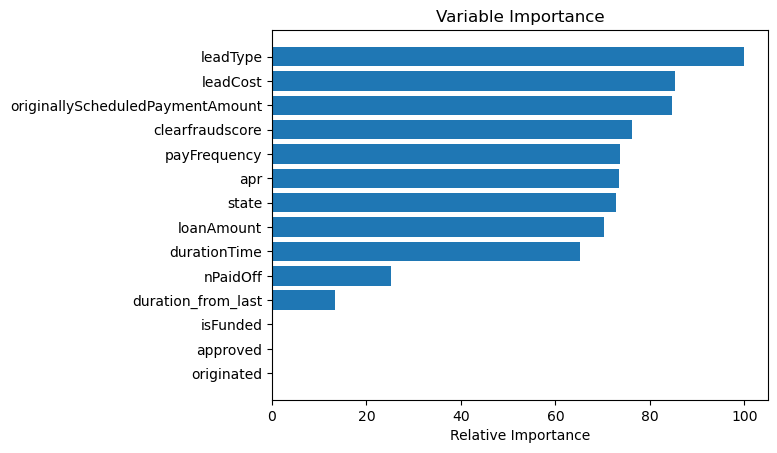

In [98]:
plot_importance(X_train_resampled, y_train_resampled,temp)

**Analysis** : In overall, as depicted in the variable importance plot above, it becomes evident that the most influential factors affecting our target variables are `leadType`, `leadCost`,`originallyScheduledPaymentAmount`,`clearfraudscore`,`payFrequency`,and `apr`. These variables stand out as the top contributors in descending order to the predictive power of the model, indicating their significance in influencing the outcomes related to the target variable.

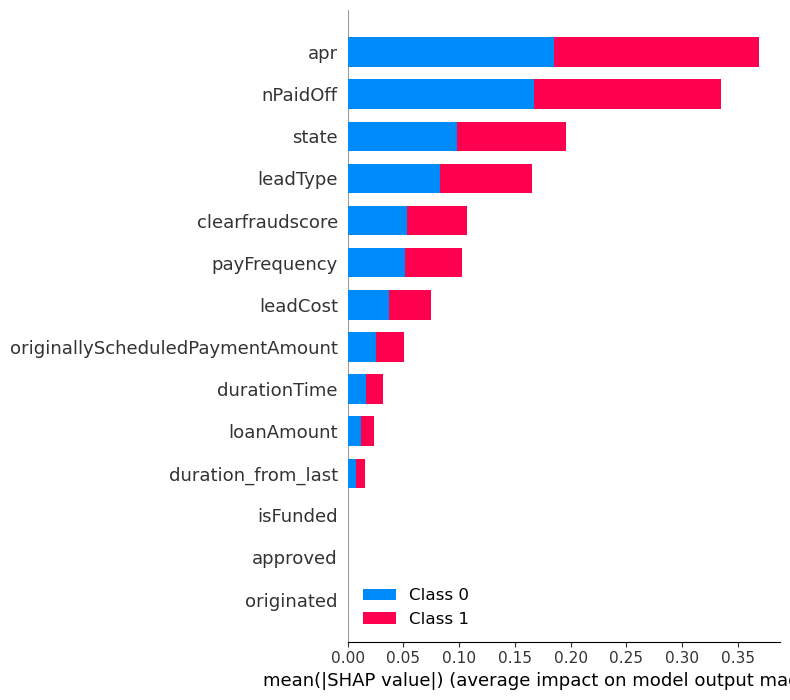

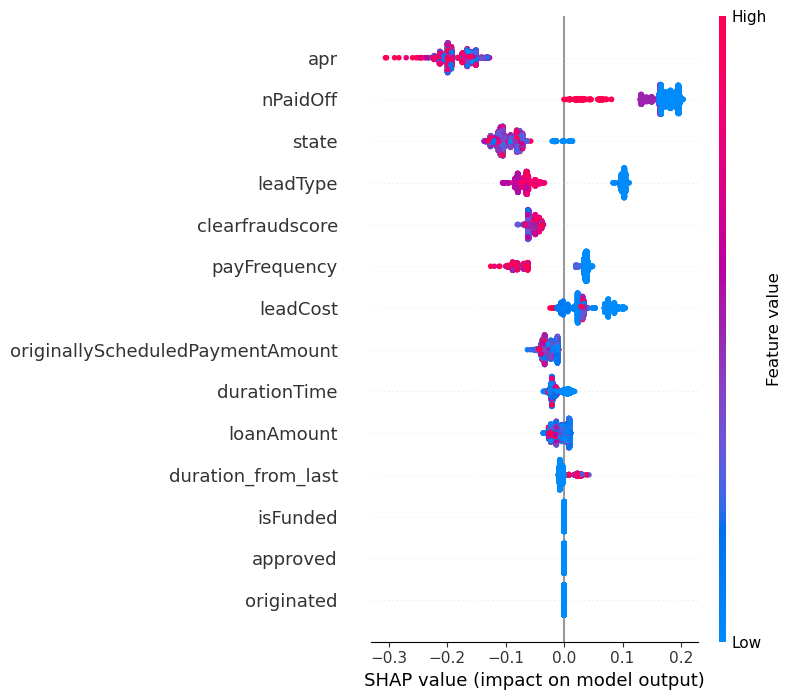

In [99]:
SHAP_functoin(X_train_resampled,X_test, y_train_resampled,y_test)

**Observations** : The overview plot presented above illustrates the significance of each feature within the model by using SHAP techniques. The findings indicate that key factors such as `apr`, `nPaidOff`, and `state` emerge as pivotal contributors in influencing the model's predicting whether a loan wiill have the potential default or not. These features play substantial roles in determining the overall predictions, emphasizing their importance in the decision-making process.

**Analysis** : The second SHAP plot illustrates the variables influencing only the default applicants, which filtered by only "1" in target variable. It's evident that `apr`, `nPaidOff`, `state` exhibit the highest influence in determining the default scenario. From this analysis, we have gained the following insights into loan defaulting:
- `apr` : A negative SHAP value associated with a higher APR indicates a tendency for the prediction of loan default to be negatively affected. This aligns with our expectations, as applicants with higher APR rates are more likely to receive a prediction of "0," suggesting a lower probability of non-defaulting. MoneyLion should consider controlling its APR within a range where applicants can comfortably meet their obligations.
- `nPaidOff` : A predominantly positive SHAP value for the `nPaidOff` variable suggests that higher values in this variable increase the likelihood of applicants defaulting on their payments. This is an intriguing observation from the dataset's historical records, indicating that applicants with an increasing number of paid-off loans tend to have a higher probability of defaulting on the remaining payments. MoneyLion can address this by implementing targeted marketing strategies, such as promotions for the final payments, to mitigate the risk associated with this pattern.
___

In short, the difference in the set of variables identified as important by Extra Tree Classifier and SHAP values can be attributed to the distinct methodologies employed by these techniques to measure feature importance.

- **Extra Tree Classifier (ETC)**
  - ETC assesses feature importance by evaluating the impurity reduction each feature brings when used in the construction of decision trees. It considers how well a feature helps to split the data into homogeneous subsets. Features with higher impurity reduction are deemed more important.

- **SHAP Values**
  - SHAP values, on the other hand, operate on a different principle. They are based on cooperative game theory, specifically the Shapley value concept. SHAP values consider the contribution of each feature to the prediction by measuring the impact of including a particular feature in every possible combination of features. It calculates the average contribution of each feature across all possible combinations.

The variation in the sets of important variables arises because ETC and SHAP interpret "importance" differently. **ETC prioritizes features that aid in optimal data splitting during the tree-building process, while SHAP values provide a holistic assessment of a feature's impact by considering its contribution in various feature combinations.**

In summary, the disparities in the identified important variables highlight the diversity in methodologies and underlying principles of Extra Tree Classifier and SHAP values for assessing feature importance.

# Conclusion

In the course of this notebook's analysis, the following milestones have been accomplished:
- Unearthed significant business insights from the provided dataset.
- Identified key variables that exert influence on the risk profile of an applicant.
- Conducted a comprehensive analysis of features.
- Experimented with diverse predictive models employing various preprocessing techniques in specified combinations.

Our project objective has been acheived by experiementing various model. In the end, the most effective predictive model for assessing the risk profile of applicants is the Random Forest model. By incorporating min max normalization and SMOTE techniques, this model achieves an **impressive accuracy of 97.54% and an outstanding ROC score of 99.08%**. As a result, we can conclude that our model has the capability to confidently identify and eliminate potential default applicants.

# Future Work

1. **Advanced Models and Hyperparameter Tuning**
   - Experiment with more sophisticated models, such as ensemble methods (e.g., stacking or boosting), artificial neural networks, or advanced tree-based models, to explore their potential in capturing complex relationships within the data and its variables.
   - Conduct extensive hyperparameter tuning to optimize the performance of the chosen models. Techniques like grid search or randomized search can be employed to find the best combination of hyperparameters for improved model accuracy.

2. **Imbalanced Data Techniques**
   - Investigate various imbalanced data techniques beyond SMOTE, such as ADASYN (Adaptive Synthetic Sampling), Tomek links, or SMOTE-ENN (SMOTE with Edited Nearest Neighbors), to evaluate their impact on model performance.
   - Explore the combination of multiple techniques, such as applying oversampling to minority classes and undersampling to majority classes, to achieve a more balanced and robust dataset.

3. **Inclusion of Additional Variables**
   - Introduce new variables that are likely to influence loan repayment, such as annual income, years of working experience, and credit score.
   - Analyze the potential correlation and importance of these additional variables through feature importance analysis and model evaluation metrics to ensure they contribute meaningfully to the predictive power of the model.

4. **Exclusion of Variables**
   - Conduct a thorough analysis of variable exclusion, considering the expertise in the domain and understanding the factors that truly impact the risk profile of a loan applicant.
   - Collaborate with subject matter experts to identify and exclude variables that might introduce noise, redundancy, or irrelevant information to the model. This process ensures that the model focuses on the most influential and meaningful features.

5. **Feature Engineering Techniques**
   - Experiment with various feature engineering techniques, such as polynomial features, interaction terms, or transformation of existing variables, to capture non-linear relationships and enhance the model's ability to discriminate between different risk profiles.
   - Utilize domain knowledge or external data sources to create new features that may provide valuable insights into the applicant's creditworthiness.

Thus, it marked the end of this assessment.

___

**Total Time Spent** : 45 hours - 50 hours

In [100]:
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', (elapsed_time / 60), 'minutes')

Execution time: 14.499678719043732 minutes
